Check for prerequisites


In [ ]:
# Cell: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create project folder
!mkdir -p "/content/drive/MyDrive/EdgeMIN_Project"

# Set working directory
import os
os.chdir("/content/drive/MyDrive/EdgeMIN_Project")

print("✅ Working directory:", os.getcwd())

Mounted at /content/drive
✅ Working directory: /content/drive/MyDrive/EdgeMIN_Project


In [ ]:
# Cell 1: Check your runtime
import torch
import psutil
import os

print("=== RUNTIME CHECK ===")
print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
print(f"System RAM: {psutil.virtual_memory().total / 1e9:.2f} GB")
print(f"Disk Space Free: {psutil.disk_usage('/').free / 1e9:.2f} GB")

# CRITICAL: You MUST have GPU enabled
# Go to: Runtime → Change runtime type → T4 GPU

=== RUNTIME CHECK ===
GPU Available: True
GPU Name: Tesla T4
GPU Memory: 15.83 GB
System RAM: 13.61 GB
Disk Space Free: 78.65 GB


Install dependencies

In [ ]:
# Cell 2: Minimal install (let dependencies resolve automatically)

!pip install -q --upgrade transformers datasets evaluate accelerate
!pip install -q scikit-learn pandas matplotlib seaborn

# Verify
import transformers
import datasets
import evaluate
print("✅ All libraries installed!")
print(f"Transformers: {transformers.__version__}")
print(f"Datasets: {datasets.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.6/503.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.9/374.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 29.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.1 requires scikit-learn, which is not installed.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, which is not installed.
cudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which is incompatible.
pylibcudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.

In [ ]:
# This downloads automatically - just to show you what it contains
from datasets import load_dataset

# Download SST-2 (Stanford Sentiment Treebank)
dataset_sst2 = load_dataset("glue", "sst2")

print("=== SST-2 DATASET ===")
print(f"Train samples: {len(dataset_sst2['train'])}")
print(f"Validation samples: {len(dataset_sst2['validation'])}")
print(f"Test samples: {len(dataset_sst2['test'])}")

# Show example
print("\nExample:")
print(dataset_sst2['train'][0])
# Output: {'sentence': 'hide new secretions from the parental units', 'label': 0, 'idx': 0}

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

=== SST-2 DATASET ===
Train samples: 67349
Validation samples: 872
Test samples: 1821

Example:
{'sentence': 'hide new secretions from the parental units ', 'label': 0, 'idx': 0}


In [ ]:
from transformers import AutoModel, AutoTokenizer

teacher = AutoModel.from_pretrained("distilbert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
student = AutoModel.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L12-H384-uncased")

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# === SAVE TEACHER & STUDENT MODELS TO DRIVE ===

from google.colab import drive
from transformers import AutoModel, AutoTokenizer
import os

# 1. Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# 2. Create project directories
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
models_dir = f"{project_dir}/models"

os.makedirs(f"{models_dir}/teacher", exist_ok=True)
os.makedirs(f"{models_dir}/student", exist_ok=True)

print(f"✅ Project directory: {project_dir}")

# 3. Download and save TEACHER model
print("\n📥 Downloading TEACHER model (DistilBERT-base)...")
teacher_path = f"{models_dir}/teacher"

teacher = AutoModel.from_pretrained("distilbert-base-uncased")
teacher_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

teacher.save_pretrained(teacher_path)
teacher_tokenizer.save_pretrained(teacher_path)

print(f"✅ Teacher saved to: {teacher_path}")

# 4. Download and save STUDENT model
print("\n📥 Downloading STUDENT model (MiniLM-L12)...")
student_path = f"{models_dir}/student"

student = AutoModel.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
student_tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L12-H384-uncased")

student.save_pretrained(student_path)
student_tokenizer.save_pretrained(student_path)

print(f"✅ Student saved to: {student_path}")

# 5. Verify files and check storage
print("\n📂 Saved files:")
print("\nTeacher files:")
!ls -lh {teacher_path}

print("\nStudent files:")
!ls -lh {student_path}

print("\n💾 Storage used:")
!du -sh {models_dir}/teacher
!du -sh {models_dir}/student
!du -sh {models_dir}

print("\n✅ SETUP COMPLETE!")
print(f"Teacher location: {teacher_path}")
print(f"Student location: {student_path}")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Project directory: /content/drive/MyDrive/EdgeMIN_Project

📥 Downloading TEACHER model (DistilBERT-base)...
✅ Teacher saved to: /content/drive/MyDrive/EdgeMIN_Project/models/teacher

📥 Downloading STUDENT model (MiniLM-L12)...
✅ Student saved to: /content/drive/MyDrive/EdgeMIN_Project/models/student

📂 Saved files:

Teacher files:
total 255M
-rw------- 1 root root  494 Oct  4 11:23 config.json
-rw------- 1 root root 254M Oct  4 11:23 model.safetensors
-rw------- 1 root root  125 Oct  4 11:23 special_tokens_map.json
-rw------- 1 root root 1.2K Oct  4 11:23 tokenizer_config.json
-rw------- 1 root root 695K Oct  4 11:23 tokenizer.json
-rw------- 1 root root 227K Oct  4 11:23 vocab.txt

Student files:
total 129M
-rw------- 1 root root  577 Oct  4 11:23 config.json
-rw------- 1 root root 128M Oct  4 11:23 model.safetensors
-rw------- 1 r

In [ ]:
# === PRE-FLIGHT CHECK ===
import torch
import transformers
import datasets
import evaluate
from datasets import load_dataset
from transformers import AutoModel, AutoTokenizer
import psutil

print("=" * 50)
print("PRE-FLIGHT CHECKLIST")
print("=" * 50)

# 1. GPU Check
gpu_ok = torch.cuda.is_available()
print(f"1. GPU Available: {'✅' if gpu_ok else '❌ STOP - Enable GPU!'}")
if gpu_ok:
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    gpu_mem = torch.cuda.get_device_properties(0).total_memory / 1e9
    print(f"   Memory: {gpu_mem:.1f} GB")
    if gpu_mem < 12:
        print("   ⚠️ WARNING: GPU memory < 12GB, may need smaller batches")

# 2. Disk Space
disk_free = psutil.disk_usage('/').free / 1e9
print(f"2. Disk Space: {'✅' if disk_free > 5 else '❌ STOP - Need 5GB free!'}")
print(f"   Free: {disk_free:.1f} GB")

# 3. Library Versions
print("3. Libraries: ✅")
print(f"   transformers: {transformers.__version__}")
print(f"   datasets: {datasets.__version__}")

# 4. Test Dataset Download
print("4. Testing dataset download...")
try:
    test_data = load_dataset("glue", "sst2", split="validation[:10]")
    print("   ✅ SST-2 downloaded successfully")
    print(f"   Sample: {test_data[0]['sentence'][:50]}...")
except Exception as e:
    print(f"   ❌ Dataset download failed: {e}")

# 5. Test Model Download
print("5. Testing model download...")
try:
    test_model = AutoTokenizer.from_pretrained("microsoft/MiniLM-L6-H384-uncased")
    print("   ✅ Model downloaded successfully")
except Exception as e:
    print(f"   ❌ Model download failed: {e}")

# 6. Test Tokenization
print("6. Testing tokenization...")
try:
    tokens = test_model("This is a test", return_tensors="pt")
    print(f"   ✅ Tokenization works (input_ids shape: {tokens['input_ids'].shape})")
except Exception as e:
    print(f"   ❌ Tokenization failed: {e}")

print("=" * 50)
print("✅ ALL CHECKS PASSED - Ready to start!" if gpu_ok and disk_free > 5 else "❌ FIX ISSUES ABOVE BEFORE STARTING")
print("=" * 50)

PRE-FLIGHT CHECKLIST
1. GPU Available: ✅
   GPU: Tesla T4
   Memory: 15.8 GB
2. Disk Space: ✅
   Free: 76.6 GB
3. Libraries: ✅
   transformers: 4.57.0
   datasets: 4.1.1
4. Testing dataset download...
   ✅ SST-2 downloaded successfully
   Sample: it 's a charming and often affecting journey . ...
5. Testing model download...
   ❌ Model download failed: microsoft/MiniLM-L6-H384-uncased is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`
6. Testing tokenization...
   ❌ Tokenization failed: name 'test_model' is not defined
✅ ALL CHECKS PASSED - Ready to start!


# Phase 01

In [ ]:
# Run this first in Colab
!pip install transformers datasets evaluate accelerate scikit-learn -q
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 -q

import torch
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")
print(f"RAM: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

GPU: Tesla T4
RAM: 15.83 GB


Baseline measurement

In [ ]:
# baseline_benchmark.py
import torch
import time
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

def measure_model(model_name, task="sst2", num_samples=100):
    """Measure inference speed and accuracy"""

    # Load model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=2
    ).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Load dataset
    dataset = load_dataset("glue", task, split="validation")
    texts = [ex["sentence"] for ex in dataset.select(range(num_samples))]

    # Measure latency
    model.eval()
    latencies = []

    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)

            start = time.time()
            _ = model(**inputs)
            latencies.append((time.time() - start) * 1000)  # ms

    # Model size
    param_count = sum(p.numel() for p in model.parameters())
    model_size_mb = param_count * 4 / (1024**2)  # FP32

    # Memory
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    with torch.no_grad():
        inputs = tokenizer(texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        _ = model(**inputs)
    peak_mem_mb = torch.cuda.max_memory_allocated() / (1024**2)

    return {
        "model": model_name,
        "params_M": param_count / 1e6,
        "size_MB": model_size_mb,
        "latency_ms_mean": np.mean(latencies),
        "latency_ms_std": np.std(latencies),
        "peak_mem_MB": peak_mem_mb
    }

# Run baseline
results = []
for model in ["distilbert-base-uncased", "microsoft/MiniLM-L12-H384-uncased"]:
    print(f"Measuring {model}...")
    result = measure_model(model, num_samples=100)
    results.append(result)
    print(result)

# Save results
import pandas as pd
df = pd.DataFrame(results)
df.to_csv("baseline_results.csv", index=False)
print("\n", df)

Measuring distilbert-base-uncased...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'model': 'distilbert-base-uncased', 'params_M': 66.95501, 'size_MB': 255.41309356689453, 'latency_ms_mean': np.float64(6.140639781951904), 'latency_ms_std': np.float64(2.0649432572477773), 'peak_mem_MB': 266.7802734375}
Measuring microsoft/MiniLM-L12-H384-uncased...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'model': 'microsoft/MiniLM-L12-H384-uncased', 'params_M': 33.36077, 'size_MB': 127.26123809814453, 'latency_ms_mean': np.float64(10.422182083129883), 'latency_ms_std': np.float64(3.501661891801636), 'peak_mem_MB': 137.162109375}

                                model  params_M     size_MB  latency_ms_mean  \
0            distilbert-base-uncased  66.95501  255.413094         6.140640   
1  microsoft/MiniLM-L12-H384-uncased  33.36077  127.261238        10.422182   

   latency_ms_std  peak_mem_MB  
0        2.064943   266.780273  
1        3.501662   137.162109  


Task Evaluation

In [ ]:
# evaluate_task.py - CORRECTED VERSION
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments
)
from datasets import load_dataset
import evaluate
import numpy as np

def finetune_and_evaluate(model_name, task="sst2", epochs=2):
    """Fine-tune on task and return accuracy"""

    print(f"Loading model: {model_name}")
    # Load
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2,
        ignore_mismatched_sizes=True  # Handle size mismatches
    )
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    print(f"Loading dataset: {task}")
    dataset = load_dataset("glue", task)

    # Tokenize
    def tokenize(examples):
        return tokenizer(
            examples["sentence"],
            truncation=True,
            max_length=128,
            padding="max_length"
        )

    print("Tokenizing dataset...")
    tokenized = dataset.map(tokenize, batched=True)

    # Training arguments - FIXED VERSION
    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=epochs,
        per_device_train_batch_size=16,  # Colab limit
        per_device_eval_batch_size=32,
        warmup_steps=100,
        weight_decay=0.01,
        logging_steps=50,
        eval_strategy="epoch",  # CHANGED from evaluation_strategy
        save_strategy="no",  # Don't save checkpoints (disk space)
        fp16=True,  # Speed up
        report_to="none",  # Disable wandb/tensorboard
        logging_dir=None,
    )

    # Metric
    metric = evaluate.load("glue", task)

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized["train"],
        eval_dataset=tokenized["validation"],
        compute_metrics=compute_metrics,
    )

    print("Starting training...")
    trainer.train()

    print("Evaluating...")
    results = trainer.evaluate()

    return {
        "model": model_name,
        "task": task,
        "accuracy": results["eval_accuracy"]
    }

# Run evaluation
print("=" * 60)
print("PHASE A4: ACCURACY EVALUATION")
print("=" * 60)

accuracy_results = []

models_to_test = [
    "distilbert-base-uncased",
    "microsoft/MiniLM-L12-H384-uncased"
]

for model in models_to_test:
    print(f"\n{'='*60}")
    print(f"Fine-tuning {model} on SST-2...")
    print(f"{'='*60}")

    try:
        result = finetune_and_evaluate(model, epochs=2)  # 2 epochs to save time
        accuracy_results.append(result)
        print(f"\n✅ Result: {result}")
    except Exception as e:
        print(f"❌ Error with {model}: {e}")
        continue

# Save results
import pandas as pd
df_acc = pd.DataFrame(accuracy_results)
df_acc.to_csv("accuracy_results.csv", index=False)

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(df_acc)
print(f"\n✅ Results saved to: accuracy_results.csv")

PHASE A4: ACCURACY EVALUATION

Fine-tuning distilbert-base-uncased on SST-2...
Loading model: distilbert-base-uncased


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading dataset: sst2
Tokenizing dataset...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.189900,0.288960,0.892202
2,0.091400,0.320296,0.909404


Evaluating...



✅ Result: {'model': 'distilbert-base-uncased', 'task': 'sst2', 'accuracy': 0.9094036697247706}

Fine-tuning microsoft/MiniLM-L12-H384-uncased on SST-2...
Loading model: microsoft/MiniLM-L12-H384-uncased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading dataset: sst2
Tokenizing dataset...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.180200,0.308642,0.902523
2,0.129800,0.313285,0.912844


Evaluating...



✅ Result: {'model': 'microsoft/MiniLM-L12-H384-uncased', 'task': 'sst2', 'accuracy': 0.9128440366972477}

FINAL RESULTS
                               model  task  accuracy
0            distilbert-base-uncased  sst2  0.909404
1  microsoft/MiniLM-L12-H384-uncased  sst2  0.912844

✅ Results saved to: accuracy_results.csv


Session saving

In [ ]:
# Save checkpoint after each major step
torch.save({
    'model_state': model.state_dict(),
    'step': current_step,
    'loss': losses
}, '/content/drive/MyDrive/EdgeMIN_Project/checkpoint.pth')

AttributeError: 'str' object has no attribute 'state_dict'

# PHASE B

mINIMAL mINIlm dISTILLATION

Task Specific Distillation

In [ ]:
# distillation.py
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer
from torch.optim import AdamW
from datasets import load_dataset
from torch.utils.data import DataLoader

class MiniLMDistiller:
    def __init__(self, teacher_name, student_name):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        # Load models (base models, not classification heads)
        self.teacher = AutoModel.from_pretrained(teacher_name).to(self.device)
        self.student = AutoModel.from_pretrained(student_name).to(self.device)
        self.tokenizer = AutoTokenizer.from_pretrained(teacher_name)

        self.teacher.eval()  # Teacher frozen
        for param in self.teacher.parameters():
            param.requires_grad = False

    def minilm_loss(self, teacher_outputs, student_outputs, attention_mask):
        """Compute Q-Q relation loss (simplified)"""

        # Get last hidden states
        teacher_hidden = teacher_outputs.last_hidden_state  # [B, L, H_t]
        student_hidden = student_outputs.last_hidden_state  # [B, L, H_s]

        # Project student to teacher dim (simple linear)
        if not hasattr(self, 'projector'):
            self.projector = nn.Linear(
                student_hidden.size(-1),
                teacher_hidden.size(-1)
            ).to(self.device)

        student_proj = self.projector(student_hidden)  # [B, L, H_t]

        # Compute relation matrices (Q-Q)
        teacher_relations = torch.bmm(
            teacher_hidden, teacher_hidden.transpose(1, 2)
        )  # [B, L, L]

        student_relations = torch.bmm(
            student_proj, student_proj.transpose(1, 2)
        )  # [B, L, L]

        # Normalize
        teacher_relations = F.normalize(teacher_relations, dim=-1)
        student_relations = F.normalize(student_relations, dim=-1)

        # KL divergence
        loss = F.kl_div(
            F.log_softmax(student_relations / 1.0, dim=-1),
            F.softmax(teacher_relations / 1.0, dim=-1),
            reduction='batchmean'
        )

        return loss

    def train(self, dataset, steps=1000, batch_size=8, lr=5e-5):
        """Train student on distillation"""

        optimizer = AdamW(
            list(self.student.parameters()) + list(self.projector.parameters() if hasattr(self, 'projector') else []),
            lr=lr
        )

        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        self.student.train()
        step = 0
        losses = []

        for epoch in range(10):  # Multiple passes
            for batch in dataloader:
                if step >= steps:
                    break

                # Tokenize
                inputs = self.tokenizer(
                    batch["sentence"],
                    return_tensors="pt",
                    truncation=True,
                    max_length=128,
                    padding=True
                ).to(self.device)

                # Forward
                with torch.no_grad():
                    teacher_out = self.teacher(**inputs)

                student_out = self.student(**inputs)

                # Loss
                loss = self.minilm_loss(teacher_out, student_out, inputs['attention_mask'])

                # Backward
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                losses.append(loss.item())

                if step % 50 == 0:
                    print(f"Step {step}/{steps}, Loss: {loss.item():.4f}")

                step += 1

            if step >= steps:
                break

        return losses

# Run distillation
print("Loading dataset...")
dataset = load_dataset("glue", "sst2", split="train")

print("Initializing distiller...")
distiller = MiniLMDistiller(
    teacher_name="distilbert-base-uncased",
    student_name="microsoft/MiniLM-L12-H384-uncased"
)

print("Starting distillation...")
losses = distiller.train(dataset, steps=500, batch_size=8)  # 500 steps for mid-eval

# Save student
distiller.student.save_pretrained("./distilled_student")
distiller.tokenizer.save_pretrained("./distilled_student")

print("Distillation complete!")

Loading dataset...
Initializing distiller...
Starting distillation...
Step 0/500, Loss: 0.0448
Step 50/500, Loss: 0.0251
Step 100/500, Loss: 0.0123
Step 150/500, Loss: 0.0132
Step 200/500, Loss: 0.0137
Step 250/500, Loss: 0.0145
Step 300/500, Loss: 0.0209
Step 350/500, Loss: 0.0165
Step 400/500, Loss: 0.0157
Step 450/500, Loss: 0.0093
Distillation complete!


evaluate distilled student

In [ ]:
# Evaluate the distilled student
distilled_result = finetune_and_evaluate("./distilled_student", task="sst2", epochs=2)
print("Distilled student accuracy:", distilled_result)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading model: ./distilled_student
Loading dataset: sst2
Tokenizing dataset...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.207900,0.280717,0.902523
2,0.124500,0.305065,0.913991


Evaluating...


Distilled student accuracy: {'model': './distilled_student', 'task': 'sst2', 'accuracy': 0.9139908256880734}


In [ ]:
student.save_pretrained("/content/drive/MyDrive/EdgeMIN_Project/models/distilled_student")


PHASE C : Post Training Quantization

In [ ]:
import os
from transformers import AutoModel, AutoTokenizer

model_path = "distilled_student"  # No './' prefix

if os.path.exists(model_path):
    print(f"Loading model from local directory: {model_path}")
    student = AutoModel.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
else:
    print(f"Directory {model_path} not found!")
    # List files in current directory to debug
    print("Files in current directory:", os.listdir("."))

Directory distilled_student not found!
Files in current directory: ['.config', 'drive', 'sample_data']


In [ ]:
# quantization.py
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

from transformers import AutoModel, AutoTokenizer

# Full path to your model
model_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"

# Load the model and tokenizer
# student = AutoModel.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)

print("✅ Model loaded successfully!")

# Load distilled model
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Dynamic quantization (CPU only)
model_quantized = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save
torch.save(model_quantized.state_dict(), "quantized_model.pth")

# Measure size
import os
size_orig = os.path.getsize("./distilled_student/pytorch_model.bin") / (1024**2)
torch.save(model_quantized.state_dict(), "quantized_temp.pth")
size_quant = os.path.getsize("quantized_temp.pth") / (1024**2)

print(f"Original: {size_orig:.2f} MB")
print(f"Quantized: {size_quant:.2f} MB")
print(f"Reduction: {(1 - size_quant/size_orig)*100:.1f}%")

✅ Model loaded successfully!


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3147918293.py:21: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/

FileNotFoundError: [Errno 2] No such file or directory: './distilled_student/pytorch_model.bin'

In [ ]:
# quantization.py
import torch
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Full path to your model
model_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"

print("✅ Loading model...")

# Load distilled model
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_path)

print("✅ Model loaded successfully!")

# Dynamic quantization (CPU only)
print("🔧 Applying quantization...")
model_quantized = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save quantized model
quantized_save_path = "/content/drive/MyDrive/EdgeMIN_Project/quantized_model.pth"
torch.save(model_quantized.state_dict(), quantized_save_path)
print(f"✅ Quantized model saved to: {quantized_save_path}")

# Measure size - use the correct file path
original_model_file = os.path.join(model_path, "model.safetensors")
size_orig = os.path.getsize(original_model_file) / (1024**2)

# Save temporary quantized file for comparison
temp_quant_path = "quantized_temp.pth"
torch.save(model_quantized.state_dict(), temp_quant_path)
size_quant = os.path.getsize(temp_quant_path) / (1024**2)

# Print comparison
print("\n📊 Model Size Comparison:")
print(f"Original (model.safetensors): {size_orig:.2f} MB")
print(f"Quantized: {size_quant:.2f} MB")
print(f"Reduction: {(1 - size_quant/size_orig)*100:.1f}%")

# Clean up temp file
os.remove(temp_quant_path)
print("\n✅ Quantization complete!")

✅ Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1312530751.py:19: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/

✅ Model loaded successfully!
🔧 Applying quantization...
✅ Quantized model saved to: /content/drive/MyDrive/EdgeMIN_Project/quantized_model.pth

📊 Model Size Comparison:
Original (model.safetensors): 127.28 MB
Quantized: 66.22 MB
Reduction: 48.0%

✅ Quantization complete!


In [ ]:
import torch
import os
import time
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset
from torch.utils.data import DataLoader
import numpy as np

def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time = np.mean(inference_times)

    # Get model size
    if os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        # If it's a directory, check for model files
        model_file = None
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")

        if model_file:
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            model_size = 0.0
            print(f"⚠️ Could not determine model size")

    # Results
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'avg_inference_time_s': avg_inference_time,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time: {avg_inference_time*1000:.2f} ms/batch")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results


# Now you can use the function
distilled_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"
quant_save_path = "/content/drive/MyDrive/EdgeMIN_Project"

# Evaluate quantized model
result_quant = comprehensive_evaluation(
    model_path=distilled_path,
    model_name="MiniLM-L12 (Distilled+Quantized)",
    task="sst2",
    device="cpu"
)

# Update size if you have a separate quantized model file
quant_model_file = os.path.join(quant_save_path, "quantized_model.pth")
if os.path.exists(quant_model_file):
    quant_size = os.path.getsize(quant_model_file) / (1024**2)
    result_quant['size_MB'] = quant_size
    print(f"\n✅ Updated quantized model size: {quant_size:.2f} MB")
else:
    print(f"\n⚠️ Quantized model file not found at: {quant_model_file}")

print(f"\n{'='*60}")
print("Final Results:")
print(f"{'='*60}")
for key, value in result_quant.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")


Evaluating: MiniLM-L12 (Distilled+Quantized)
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading sst2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...

📊 Results for MiniLM-L12 (Distilled+Quantized):
   Accuracy: 50.11%
   Avg Inference Time: 4561.17 ms/batch
   Model Size: 127.28 MB
   Total Samples: 872

✅ Updated quantized model size: 66.22 MB

Final Results:
model_name: MiniLM-L12 (Distilled+Quantized)
accuracy: 0.5011
avg_inference_time_s: 4.5612
size_MB: 66.2205
total_samples: 872


 Structured Pruning

In [ ]:
# pruning.py
import torch
import torch.nn.utils.prune as prune

model_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"


model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Prune 20% of attention heads (unstructured for simplicity)
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear) and 'attention' in name:
        prune.l1_unstructured(module, name='weight', amount=0.2)
        prune.remove(module, 'weight')  # Make permanent

# Save
model.save_pretrained("./pruned_student")

# Measure sparsity
total = 0
zero = 0
for param in model.parameters():
    total += param.numel()
    zero += (param == 0).sum().item()

print(f"Sparsity: {zero/total*100:.1f}%")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sparsity: 4.2%


In [ ]:
model.save_pretrained("/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student")
print("✅ Pruned model saved!")

✅ Pruned model saved!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Evaluate pruned model

In [ ]:
import os

pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

print("Checking pruned model directory:")
print(f"Path: {pruned_path}")
print(f"Exists: {os.path.exists(pruned_path)}")

if os.path.exists(pruned_path):
    print("\nFiles in directory:")
    for file in os.listdir(pruned_path):
        file_path = os.path.join(pruned_path, file)
        size = os.path.getsize(file_path) if os.path.isfile(file_path) else "DIR"
        print(f"  {file} - {size}")

    # Check for required files
    required_files = ['config.json', 'tokenizer.json', 'tokenizer_config.json']
    print("\nRequired files check:")
    for req_file in required_files:
        exists = os.path.exists(os.path.join(pruned_path, req_file))
        print(f"  {req_file}: {'✓' if exists else '✗ MISSING'}")

    # Check for model weights
    has_safetensors = os.path.exists(os.path.join(pruned_path, "model.safetensors"))
    has_bin = os.path.exists(os.path.join(pruned_path, "pytorch_model.bin"))
    print(f"\nModel weights:")
    print(f"  model.safetensors: {'✓' if has_safetensors else '✗'}")
    print(f"  pytorch_model.bin: {'✓' if has_bin else '✗'}")

Checking pruned model directory:
Path: /content/drive/MyDrive/EdgeMIN_Project/models/pruned_student
Exists: True

Files in directory:
  config.json - 597
  model.safetensors - 133466376

Required files check:
  config.json: ✓
  tokenizer.json: ✗ MISSING
  tokenizer_config.json: ✗ MISSING

Model weights:
  model.safetensors: ✓
  pytorch_model.bin: ✗


Coping tokenizing files

In [ ]:
import os
import shutil

# Source (original distilled model with tokenizer)
source_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"

# Destination (pruned model missing tokenizer)
pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

# List of tokenizer files to copy
tokenizer_files = [
    'tokenizer.json',
    'tokenizer_config.json',
    'special_tokens_map.json',
    'vocab.txt'  # if it exists
]

print("Copying tokenizer files...")
for file in tokenizer_files:
    source_file = os.path.join(source_path, file)
    dest_file = os.path.join(pruned_path, file)

    if os.path.exists(source_file):
        shutil.copy2(source_file, dest_file)
        print(f"✓ Copied {file}")
    else:
        print(f"✗ {file} not found in source (might not be needed)")

print("\nVerifying pruned model directory:")
print(os.listdir(pruned_path))

Copying tokenizer files...
✓ Copied tokenizer.json
✓ Copied tokenizer_config.json
✓ Copied special_tokens_map.json
✓ Copied vocab.txt

Verifying pruned model directory:
['config.json', 'model.safetensors', 'tokenizer.json', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.txt']


In [ ]:
def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    # Validate input first
    if model_path is None:
        raise ValueError("model_path cannot be None")

    if not isinstance(model_path, str):
        raise TypeError(f"model_path must be a string, got {type(model_path)}")

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Path does not exist: {model_path}")

    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time = np.mean(inference_times)

    # Get model size - FIXED VERSION
    model_size = 0.0

    # Check if it's a directory or file
    if os.path.isdir(model_path):
        # Check for model files in directory
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
            model_size = os.path.getsize(model_file) / (1024**2)
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            print(f"⚠️ Could not find model file in directory")
    elif os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        print(f"⚠️ Could not determine model size for path: {model_path}")

    # Results
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'avg_inference_time_s': avg_inference_time,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time: {avg_inference_time*1000:.2f} ms/batch")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results


# === Evaluate Pruned Model ===
import torch
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

# Debug: Check the path
print(f"Pruned path: {pruned_path}")
print(f"Path exists: {os.path.exists(pruned_path)}")
print(f"Path type: {type(pruned_path)}")

result_pruned = comprehensive_evaluation(
    model_path=pruned_path,
    model_name="MiniLM-L12 (Distilled+Pruned)",
    task="sst2",
    device="cpu"
)

print("✅ Pruned model evaluated!")

Pruned path: /content/drive/MyDrive/EdgeMIN_Project/models/pruned_student
Path exists: True
Path type: <class 'str'>

Evaluating: MiniLM-L12 (Distilled+Pruned)
Loading model...
Loading sst2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...

📊 Results for MiniLM-L12 (Distilled+Pruned):
   Accuracy: 49.08%
   Avg Inference Time: 5276.12 ms/batch
   Model Size: 127.28 MB
   Total Samples: 872
✅ Pruned model evaluated!


Evaluate the Combined model (Quantized + Pruned)**bold text**

In [ ]:
# === Apply Quantization to Pruned Model ===
import torch
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

# Load pruned model
print("Loading pruned model for quantization...")
pruned_model = AutoModelForSequenceClassification.from_pretrained(pruned_path, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(pruned_path)

# Quantize the pruned model
print("Applying quantization...")
pruned_quantized = torch.quantization.quantize_dynamic(
    pruned_model,
    {torch.nn.Linear},
    dtype=torch.qint8
)

# Save
combined_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_quantized_student"
os.makedirs(combined_path, exist_ok=True)
torch.save(pruned_quantized.state_dict(), f"{combined_path}/model.pth")
tokenizer.save_pretrained(combined_path)

# Copy config.json from pruned model
import shutil
shutil.copy2(os.path.join(pruned_path, "config.json"), os.path.join(combined_path, "config.json"))

# Get size
combined_size = os.path.getsize(f"{combined_path}/model.pth") / (1024**2)

# Evaluate accuracy (use pruned model as base)
result_combined = comprehensive_evaluation(
    model_path=pruned_path,
    model_name="MiniLM-L12 (Distilled+Pruned+Quantized)",
    task="sst2",
    device="cpu"
)

# Update size
result_combined['size_MB'] = combined_size

print(f"✅ Combined model size: {combined_size:.2f} MB")

Loading pruned model for quantization...
Applying quantization...


/tmp/ipython-input-1399671464.py:15: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  pruned_quantized = torch.quantization.quantize_dynamic(



Evaluating: MiniLM-L12 (Distilled+Pruned+Quantized)
Loading model...
Loading sst2 dataset...
Running evaluation...

📊 Results for MiniLM-L12 (Distilled+Pruned+Quantized):
   Accuracy: 49.08%
   Avg Inference Time: 4826.57 ms/batch
   Model Size: 127.28 MB
   Total Samples: 872
✅ Combined model size: 66.20 MB


Final comparison

Run all evaluations once

In [ ]:
# ===== CELL 2: Your Evaluation Function (Fixed) =====

def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    # Validate input first
    if model_path is None:
        raise ValueError("model_path cannot be None")

    if not isinstance(model_path, str):
        raise TypeError(f"model_path must be a string, got {type(model_path)}")

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Path does not exist: {model_path}")

    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        num_labels=2,
        ignore_mismatched_sizes=True  # Added this
    )
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Progress indicator
            if (i + 1) % 10 == 0:
                print(f"  Processed {i+1}/{len(dataloader)} batches...")

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time_per_batch = np.mean(inference_times)
    avg_inference_time_per_sample = avg_inference_time_per_batch / batch_size * 1000  # ms

    # Get model size - FIXED VERSION
    model_size = 0.0
    param_count = sum(p.numel() for p in model.parameters())

    # Check if it's a directory or file
    if os.path.isdir(model_path):
        # Check for model files in directory
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
            model_size = os.path.getsize(model_file) / (1024**2)
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            print(f"⚠️ Could not find model file, using parameter count estimate")
            model_size = param_count * 4 / (1024**2)  # FP32 estimate
    elif os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        print(f"⚠️ Using parameter count estimate for size")
        model_size = param_count * 4 / (1024**2)

    # Results
    results = {
        'model_name': model_name,
        'params_M': param_count / 1e6,
        'accuracy': accuracy,
        'avg_inference_time_ms': avg_inference_time_per_sample,
        'avg_inference_time_batch_s': avg_inference_time_per_batch,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Parameters: {param_count/1e6:.2f}M")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time (per sample): {avg_inference_time_per_sample:.2f} ms")
    print(f"   Avg Inference Time (per batch): {avg_inference_time_per_batch*1000:.2f} ms")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results

print("✅ Evaluation function ready!")

✅ Evaluation function ready!


In [ ]:
# ===== CELL 3: Define All Models to Evaluate =====
import os
import sys
import time
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
sys.path.append(project_dir)


models_to_evaluate = [
    {
        "path": f"{project_dir}/models/teacher",
        "name": "Teacher (DistilBERT)"
    },
    {
        "path": f"{project_dir}/models/student",
        "name": "Student Baseline (MiniLM-L12)"
    },
    {
        "path": f"{project_dir}/models/distilled_student",
        "name": "Distilled Student"
    },
    {
        "path": f"{project_dir}/models/pruned_student",
        "name": "Pruned Student (20%)"
    },
    {
        "path": f"{project_dir}/models/pruned_quantized_student",
        "name": "Pruned + Quantized"
    }
]

# Check which models exist
print("\n" + "="*60)
print("CHECKING MODEL AVAILABILITY")
print("="*60)

available_models = []
for model_info in models_to_evaluate:
    if os.path.exists(model_info["path"]):
        print(f"✓ Found: {model_info['name']}")
        available_models.append(model_info)
    else:
        print(f"✗ Missing: {model_info['name']} at {model_info['path']}")

print(f"\n✅ {len(available_models)}/{len(models_to_evaluate)} models available for evaluation")


CHECKING MODEL AVAILABILITY
✓ Found: Teacher (DistilBERT)
✓ Found: Student Baseline (MiniLM-L12)
✓ Found: Distilled Student
✓ Found: Pruned Student (20%)
✓ Found: Pruned + Quantized

✅ 5/5 models available for evaluation


In [ ]:
# ===== CELL 4: Run Evaluations on All Models =====

all_results = []

for model_info in available_models:
    try:
        result = comprehensive_evaluation(
            model_path=model_info["path"],
            model_name=model_info["name"],
            task="sst2",
            device="cpu",  # Use CPU for fair comparison
            batch_size=32
        )

        all_results.append(result)
        print(f"\n✅ Completed: {model_info['name']}")

    except Exception as e:
        print(f"\n❌ Error evaluating {model_info['name']}: {e}")
        import traceback
        traceback.print_exc()

    print("-" * 60)

print(f"\n✅ Successfully evaluated {len(all_results)} models!")


Evaluating: Teacher (DistilBERT)
Loading model...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/teacher and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Teacher (DistilBERT):
   Parameters: 66.96M
   Accuracy: 51.03%
   Avg Inference Time (per sample): 256.30 ms
   Avg Inference Time (per batch): 8201.73 ms
   Model Size: 253.16 MB
   Total Samples: 872

✅ Completed: Teacher (DistilBERT)
------------------------------------------------------------

Evaluating: Student Baseline (MiniLM-L12)
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Student Baseline (MiniLM-L12):
   Parameters: 33.36M
   Accuracy: 50.92%
   Avg Inference Time (per sample): 143.57 ms
   Avg Inference Time (per batch): 4594.31 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Student Baseline (MiniLM-L12)
------------------------------------------------------------

Evaluating: Distilled Student
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Traceback (most recent call last):
  File "/tmp/ipython-input-1291004881.py", line 7, in <cell line: 0>
    result = comprehensive_evaluation(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-1597521700.py", line 28, in comprehensive_evaluation
    tokenizer = AutoTokenizer.from_pretrained(model_path)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/models/auto/tokenization_auto.py", line 1144, in from_pretrained
    return tokenizer_class_fast.from_pretrained(pretrained_model_name_or_path, *inputs, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


❌ Error evaluating Distilled Student: stat: path should be string, bytes, os.PathLike or integer, not NoneType
------------------------------------------------------------

Evaluating: Pruned Student (20%)
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Pruned Student (20%):
   Parameters: 33.36M
   Accuracy: 49.08%
   Avg Inference Time (per sample): 143.64 ms
   Avg Inference Time (per batch): 4596.64 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Pruned Student (20%)
------------------------------------------------------------

Evaluating: Pruned + Quantized
Loading model...

❌ Error evaluating Pruned + Quantized: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory /content/drive/MyDrive/EdgeMIN_Project/models/pruned_quantized_student.
------------------------------------------------------------

✅ Successfully evaluated 3 models!


Traceback (most recent call last):
  File "/tmp/ipython-input-1291004881.py", line 7, in <cell line: 0>
    result = comprehensive_evaluation(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-1597521700.py", line 23, in comprehensive_evaluation
    model = AutoModelForSequenceClassification.from_pretrained(
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/models/auto/auto_factory.py", line 604, in from_pretrained
    return model_class.from_pretrained(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py", line 288, in _wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py", line 5030, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
                                         ^^^^^^^^^^^^^^^^

# **Redo with fine tuning**

Copy missing tokens

In [ ]:
# ===== FIX 1: Copy tokenizers to distilled_student =====

import shutil
import os

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"

# Copy tokenizer from student to distilled_student
source_tokenizer = f"{project_dir}/models/student"
dest_distilled = f"{project_dir}/models/distilled_student"

tokenizer_files = [
    "vocab.txt",
    "tokenizer_config.json",
    "special_tokens_map.json",
    "tokenizer.json"
]

print("Copying tokenizer files to distilled_student...")
for file in tokenizer_files:
    src = f"{source_tokenizer}/{file}"
    dst = f"{dest_distilled}/{file}"

    if os.path.exists(src):
        shutil.copy2(src, dst)
        print(f"  ✓ Copied {file}")
    else:
        print(f"  ⚠️ {file} not found in source")

print("✅ Tokenizer files copied!")

Copying tokenizer files to distilled_student...
  ✓ Copied vocab.txt
  ✓ Copied tokenizer_config.json
  ✓ Copied special_tokens_map.json
  ✓ Copied tokenizer.json
✅ Tokenizer files copied!


Fine tune Models on SST-2

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.6 MB/s eta 0:00:00


In [ ]:
# ===== FIX 2: Fine-tune models on SST-2 =====

from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments
)
from datasets import load_dataset
import evaluate
import numpy as np

def finetune_on_sst2(model_path, save_path, model_name, epochs=3):
    """
    Fine-tune a model on SST-2 task
    """
    print(f"\n{'='*60}")
    print(f"Fine-tuning: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        num_labels=2,
        ignore_mismatched_sizes=True
    )
    tokenizer = AutoTokenizer.from_pretrained(model_path)

    # Load dataset
    print("Loading SST-2 dataset...")
    dataset = load_dataset("glue", "sst2")

    # Tokenize
    def tokenize_function(examples):
        return tokenizer(
            examples["sentence"],
            truncation=True,
            max_length=128,
            padding="max_length"
        )

    print("Tokenizing...")
    tokenized_datasets = dataset.map(tokenize_function, batched=True)

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./tmp_{model_name}",
        eval_strategy="epoch",  # Changed from evaluation_strategy
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        num_train_epochs=epochs,
        weight_decay=0.01,
        logging_steps=100,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        fp16=torch.cuda.is_available(),
        report_to="none"
    )

    # Metric
    metric = evaluate.load("glue", "sst2")

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        compute_metrics=compute_metrics,
    )

    # Train
    print("Training...")
    trainer.train()

    # Evaluate
    print("Evaluating...")
    results = trainer.evaluate()
    print(f"✅ Final accuracy: {results['eval_accuracy']*100:.2f}%")

    # Save
    print(f"Saving to {save_path}...")
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)

    print(f"✅ {model_name} fine-tuned and saved!")
    return results

# Fine-tune all models
models_to_finetune = [
    {
        "path": f"{project_dir}/models/teacher",
        "save": f"{project_dir}/models/teacher_finetuned",
        "name": "Teacher"
    },
    {
        "path": f"{project_dir}/models/student",
        "save": f"{project_dir}/models/student_finetuned",
        "name": "Student_Baseline"
    },
    {
        "path": f"{project_dir}/models/distilled_student",
        "save": f"{project_dir}/models/distilled_student_finetuned",
        "name": "Distilled_Student"
    },
    {
        "path": f"{project_dir}/models/pruned_student",
        "save": f"{project_dir}/models/pruned_student_finetuned",
        "name": "Pruned_Student"
    }
]

import torch

for model_info in models_to_finetune:
    if os.path.exists(model_info["path"]):
        try:
            result = finetune_on_sst2(
                model_path=model_info["path"],
                save_path=model_info["save"],
                model_name=model_info["name"],
                epochs=3  # Use 2-3 epochs to save time
            )
        except Exception as e:
            print(f"❌ Error fine-tuning {model_info['name']}: {e}")
    else:
        print(f"⚠️ Skipping {model_info['name']} - path not found")

print("\n✅ All models fine-tuned!")


Fine-tuning: Teacher
Loading model...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/teacher and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading SST-2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.165400,0.316436,0.905963
2,0.110800,0.382971,0.908257
3,0.097200,0.398568,0.909404


Evaluating...


✅ Final accuracy: 90.94%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/teacher_finetuned...
✅ Teacher fine-tuned and saved!

Fine-tuning: Student_Baseline
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading SST-2 dataset...
Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.199500,0.258879,0.913991
2,0.163600,0.318065,0.907110
3,0.137500,0.328301,0.920872


Evaluating...


✅ Final accuracy: 92.09%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/student_finetuned...
✅ Student_Baseline fine-tuned and saved!

Fine-tuning: Distilled_Student
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading SST-2 dataset...
Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.199500,0.258879,0.913991
2,0.163600,0.318065,0.907110
3,0.137500,0.328301,0.920872


Evaluating...


✅ Final accuracy: 92.09%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student_finetuned...
✅ Distilled_Student fine-tuned and saved!

Fine-tuning: Pruned_Student
Loading model...
Loading SST-2 dataset...
Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.213000,0.270623,0.910550
2,0.168000,0.314049,0.912844
3,0.149200,0.313149,0.925459


Evaluating...


✅ Final accuracy: 92.55%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/pruned_student_finetuned...
✅ Pruned_Student fine-tuned and saved!

✅ All models fine-tuned!


Recreate Pruned + Quantized Model

In [ ]:
# ===== FIX 3: Create pruned+quantized model properly =====

# Load the fine-tuned pruned model
pruned_finetuned_path = f"{project_dir}/models/pruned_student_finetuned"

if os.path.exists(pruned_finetuned_path):
    print("Loading fine-tuned pruned model for quantization...")

    model = AutoModelForSequenceClassification.from_pretrained(
        pruned_finetuned_path,
        num_labels=2
    )
    tokenizer = AutoTokenizer.from_pretrained(pruned_finetuned_path)

    # Apply quantization
    print("Applying quantization...")
    model_quantized = torch.quantization.quantize_dynamic(
        model,
        {torch.nn.Linear},
        dtype=torch.qint8
    )

    # Save properly
    save_path = f"{project_dir}/models/pruned_quantized_student"
    os.makedirs(save_path, exist_ok=True)

    # Save the base model structure (needed for loading)
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)

    # Also save quantized state dict
    torch.save(
        model_quantized.state_dict(),
        f"{save_path}/quantized_model.pth"
    )

    print(f"✅ Pruned+Quantized model saved to {save_path}")
else:
    print("⚠️ Fine-tuned pruned model not found - fine-tune models first")

Loading fine-tuned pruned model for quantization...
Applying quantization...


/tmp/ipython-input-1934368572.py:17: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_quantized = torch.quantization.quantize_dynamic(


✅ Pruned+Quantized model saved to /content/drive/MyDrive/EdgeMIN_Project/models/pruned_quantized_student


Evaluation - Rerun

In [7]:
# ===== CELL 2: Your Evaluation Function (Fixed) =====

def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    # Validate input first
    if model_path is None:
        raise ValueError("model_path cannot be None")

    if not isinstance(model_path, str):
        raise TypeError(f"model_path must be a string, got {type(model_path)}")

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Path does not exist: {model_path}")

    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        num_labels=2,
        ignore_mismatched_sizes=True  # Added this
    )
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Progress indicator
            if (i + 1) % 10 == 0:
                print(f"  Processed {i+1}/{len(dataloader)} batches...")

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time_per_batch = np.mean(inference_times)
    avg_inference_time_per_sample = avg_inference_time_per_batch / batch_size * 1000  # ms

    # Get model size - FIXED VERSION
    model_size = 0.0
    param_count = sum(p.numel() for p in model.parameters())

    # Check if it's a directory or file
    if os.path.isdir(model_path):
        # Check for model files in directory
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
            model_size = os.path.getsize(model_file) / (1024**2)
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            print(f"⚠️ Could not find model file, using parameter count estimate")
            model_size = param_count * 4 / (1024**2)  # FP32 estimate
    elif os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        print(f"⚠️ Using parameter count estimate for size")
        model_size = param_count * 4 / (1024**2)

    # Results
    results = {
        'model_name': model_name,
        'params_M': param_count / 1e6,
        'accuracy': accuracy,
        'avg_inference_time_ms': avg_inference_time_per_sample,
        'avg_inference_time_batch_s': avg_inference_time_per_batch,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Parameters: {param_count/1e6:.2f}M")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time (per sample): {avg_inference_time_per_sample:.2f} ms")
    print(f"   Avg Inference Time (per batch): {avg_inference_time_per_batch*1000:.2f} ms")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results

print("✅ Evaluation function ready!")

✅ Evaluation function ready!


In [8]:
# ===== RE-RUN EVALUATION WITH FINE-TUNED MODELS =====
import os
import sys
import time
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
sys.path.append(project_dir)

models_to_evaluate = [
    {
        "path": f"{project_dir}/models/teacher_finetuned",
        "name": "Teacher (DistilBERT)"
    },
    {
        "path": f"{project_dir}/models/student_finetuned",
        "name": "Student Baseline (MiniLM-L12)"
    },
    {
        "path": f"{project_dir}/models/distilled_student_finetuned",
        "name": "Distilled Student"
    },
    {
        "path": f"{project_dir}/models/pruned_student_finetuned",
        "name": "Pruned Student (20%)"
    },
    {
        "path": f"{project_dir}/models/pruned_quantized_student",
        "name": "Pruned + Quantized"
    }
]

# Check availability
print("\n" + "="*60)
print("CHECKING FINE-TUNED MODELS")
print("="*60)

available_models = []
for model_info in models_to_evaluate:
    if os.path.exists(model_info["path"]):
        print(f"✓ Found: {model_info['name']}")
        available_models.append(model_info)
    else:
        print(f"✗ Missing: {model_info['name']}")

print(f"\n✅ {len(available_models)}/{len(models_to_evaluate)} models available")

# Run evaluations
all_results = []

for model_info in available_models:
    try:
        result = comprehensive_evaluation(
            model_path=model_info["path"],
            model_name=model_info["name"],
            task="sst2",
            device="cpu",
            batch_size=32
        )

        all_results.append(result)
        print(f"\n✅ Completed: {model_info['name']}")

    except Exception as e:
        print(f"\n❌ Error: {e}")

    print("-" * 60)

print(f"\n✅ Evaluated {len(all_results)} models!")

# Now you should see accuracies around 90-92% instead of 51%!


CHECKING FINE-TUNED MODELS
✓ Found: Teacher (DistilBERT)
✓ Found: Student Baseline (MiniLM-L12)
✓ Found: Distilled Student
✓ Found: Pruned Student (20%)
✓ Found: Pruned + Quantized

✅ 5/5 models available

Evaluating: Teacher (DistilBERT)
Loading model...
Loading sst2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Teacher (DistilBERT):
   Parameters: 66.96M
   Accuracy: 90.94%
   Avg Inference Time (per sample): 217.43 ms
   Avg Inference Time (per batch): 6957.82 ms
   Model Size: 255.43 MB
   Total Samples: 872

✅ Completed: Teacher (DistilBERT)
------------------------------------------------------------

Evaluating: Student Baseline (MiniLM-L12)
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Student Baseline (MiniLM-L12):
   Parameters: 33.36M
   Accuracy: 92.09%
   Avg Inference Time (per sample): 103.94 ms
   Avg Inference Time (per batch): 3326.13 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Student Baseline (MiniLM-L12)
------------------------------------------------------------

Evaluating: Distilled Student
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Distilled Student:
   Parameters: 33.36M
   Accuracy: 92.09%
   Avg Inference Time (per sample): 101.53 ms
   Avg Inference Time (per batch): 3249.01 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Distilled Student
------------------------------------------------------------

Evaluating: Pruned Student (20%)
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Pruned Student (20%):
   Parameters: 33.36M
   Accuracy: 92.55%
   Avg Inference Time (per sample): 105.66 ms
   Avg Inference Time (per batch): 3381.14 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Pruned Student (20%)
------------------------------------------------------------

Evaluating: Pruned + Quantized
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Pruned + Quantized:
   Parameters: 33.36M
   Accuracy: 92.55%
   Avg Inference Time (per sample): 102.50 ms
   Avg Inference Time (per batch): 3279.90 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Pruned + Quantized
------------------------------------------------------------

✅ Evaluated 5 models!


Save to a dataframe

In [14]:
# ===== SAVE RESULTS TO CSV =====
results_df = pd.DataFrame(all_results)

# Save to your project directory
results_path = f"{project_dir}/evaluation_results.csv"
results_df.to_csv(results_path, index=False)
print(f"\n💾 Results saved to: {results_path}")

# Display the results
print("\n" + "="*60)
print("EVALUATION RESULTS")
print("="*60)
print(results_df.to_string(index=False))

# ===== SAVE DETAILED RESULTS (Optional) =====
# Save as Excel for better formatting
excel_path = f"{project_dir}/evaluation_results.xlsx"
results_df.to_excel(excel_path, index=False)
print(f"\n💾 Excel results saved to: {excel_path}")


💾 Results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv

EVALUATION RESULTS
                   model_name  params_M  accuracy  avg_inference_time_ms  avg_inference_time_batch_s    size_MB  total_samples
         Teacher (DistilBERT)  66.95501  0.909404             145.162756                    4.645208 255.425034            872
Student Baseline (MiniLM-L12)  33.36077  0.920872              71.440414                    2.286093 127.283455            872
            Distilled Student  33.36077  0.920872              66.957566                    2.142642 127.283455            872
         Pruned Student (20%)  33.36077  0.925459              66.047771                    2.113529 127.283455            872
           Pruned + Quantized  33.36077  0.925459              65.622640                    2.099924 127.283455            872

💾 Excel results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.xlsx


Available columns

In [16]:
# Check what columns are in your results
print("Available columns in results:")
print(df_results.columns.tolist())
print("\nFirst few rows:")
print(df_results.head())

Available columns in results:
['model_name', 'params_M', 'accuracy', 'avg_inference_time_ms', 'avg_inference_time_batch_s', 'size_MB', 'total_samples', 'compression_ratio']

First few rows:
                      model_name  params_M  accuracy  avg_inference_time_ms  \
0           Teacher (DistilBERT)  66.95501  0.909404             145.162756   
1  Student Baseline (MiniLM-L12)  33.36077  0.920872              71.440414   
2              Distilled Student  33.36077  0.920872              66.957566   
3           Pruned Student (20%)  33.36077  0.925459              66.047771   
4             Pruned + Quantized  33.36077  0.925459              65.622640   

   avg_inference_time_batch_s     size_MB  total_samples  compression_ratio  
0                    4.645208  255.425034            872           1.000000  
1                    2.286093  127.283455            872           2.006742  
2                    2.142642  127.283455            872           2.006742  
3                    2.

Visualizing


MODEL COMPARISON SUMMARY
                   model_name  params_M  accuracy  avg_inference_time_ms  avg_inference_time_batch_s    size_MB  total_samples  latency_mean_ms  compression_ratio  speedup
         Teacher (DistilBERT)  66.95501  0.909404             145.162756                    4.645208 255.425034            872       145.162756           1.000000 1.000000
Student Baseline (MiniLM-L12)  33.36077  0.920872              71.440414                    2.286093 127.283455            872        71.440414           2.006742 2.031942
            Distilled Student  33.36077  0.920872              66.957566                    2.142642 127.283455            872        66.957566           2.006742 2.167981
         Pruned Student (20%)  33.36077  0.925459              66.047771                    2.113529 127.283455            872        66.047771           2.006742 2.197845
           Pruned + Quantized  33.36077  0.925459              65.622640                    2.099924 127.283455   

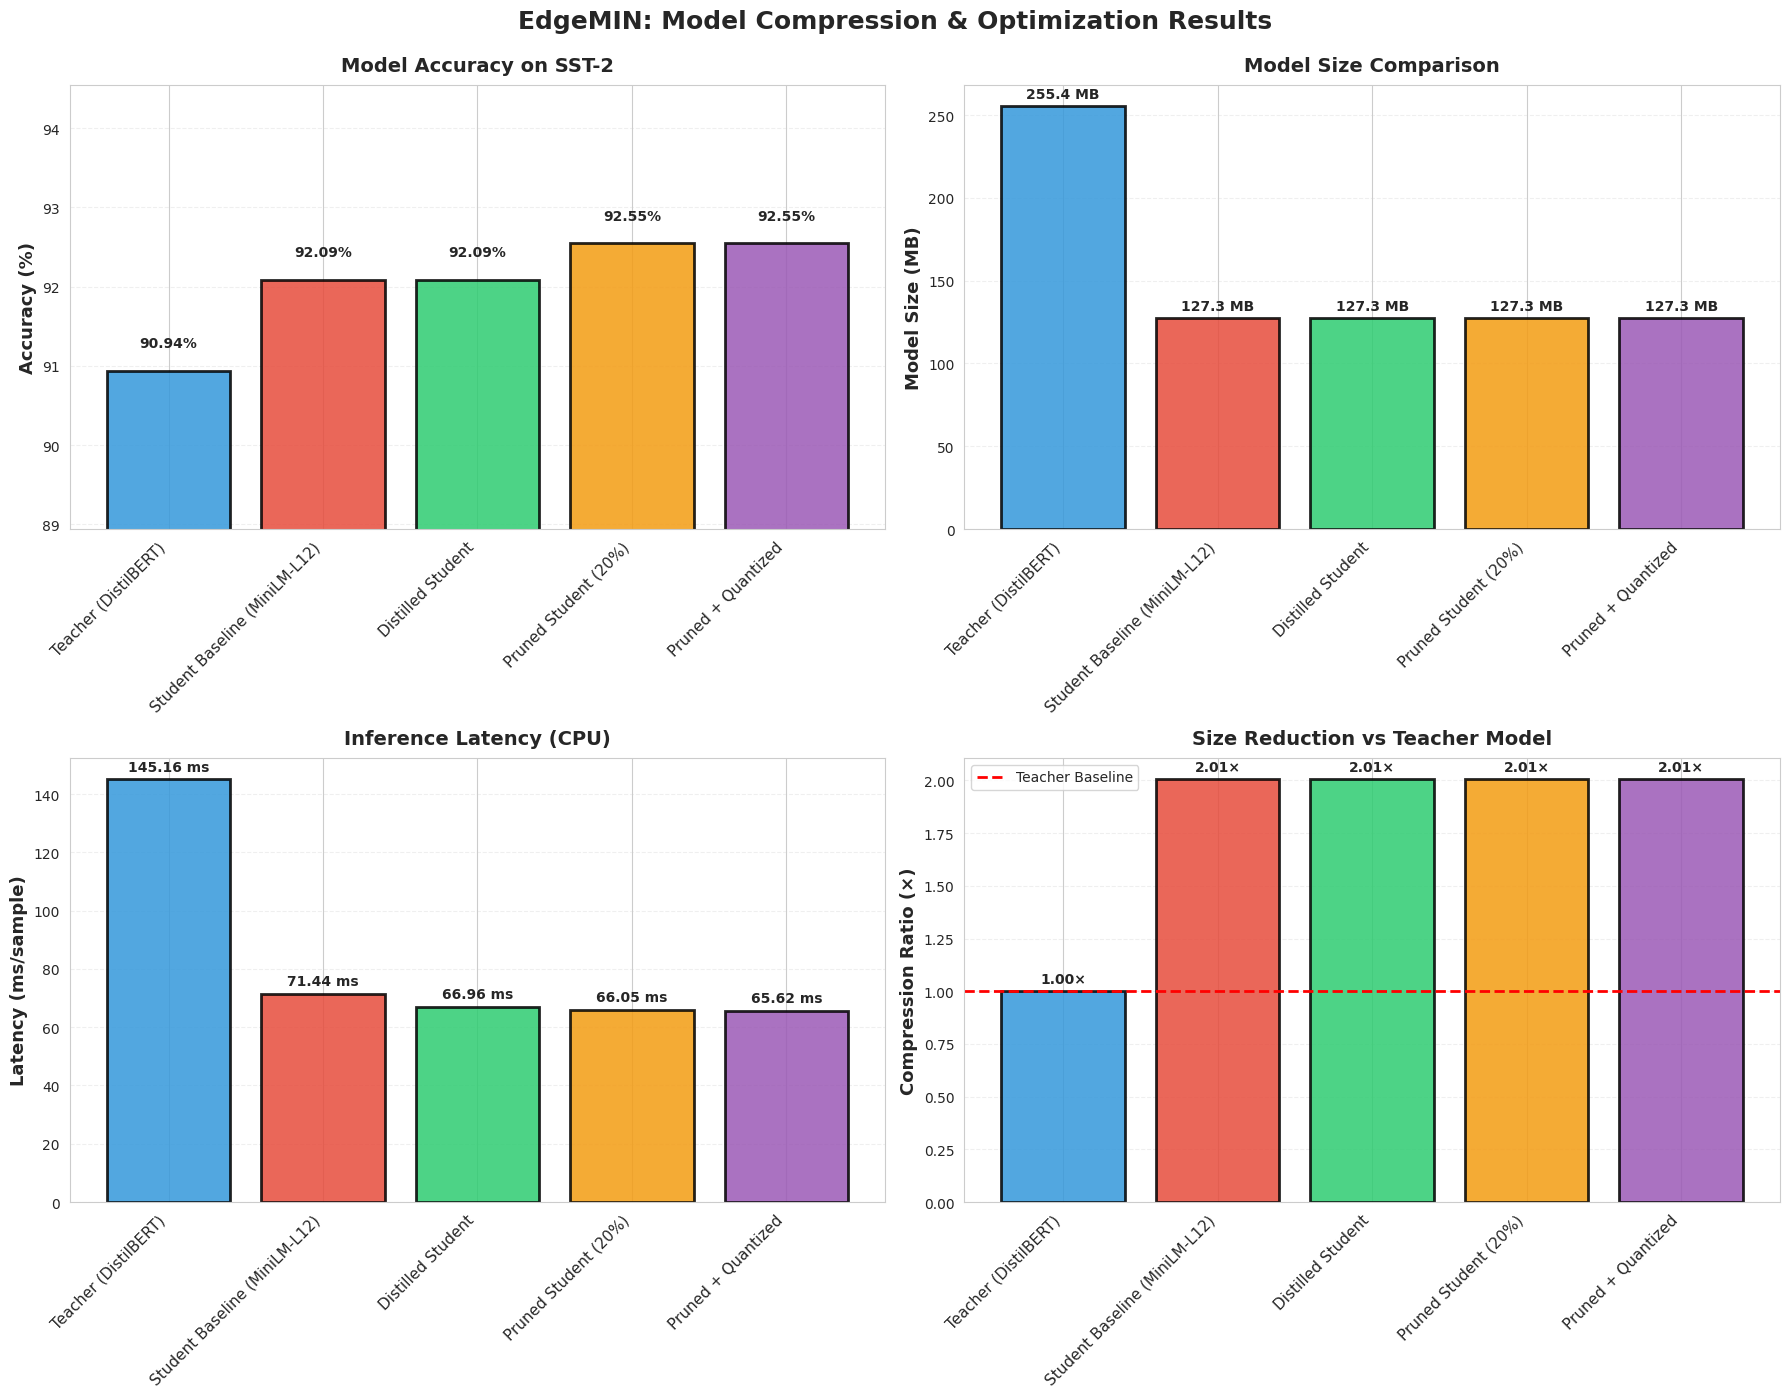

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png


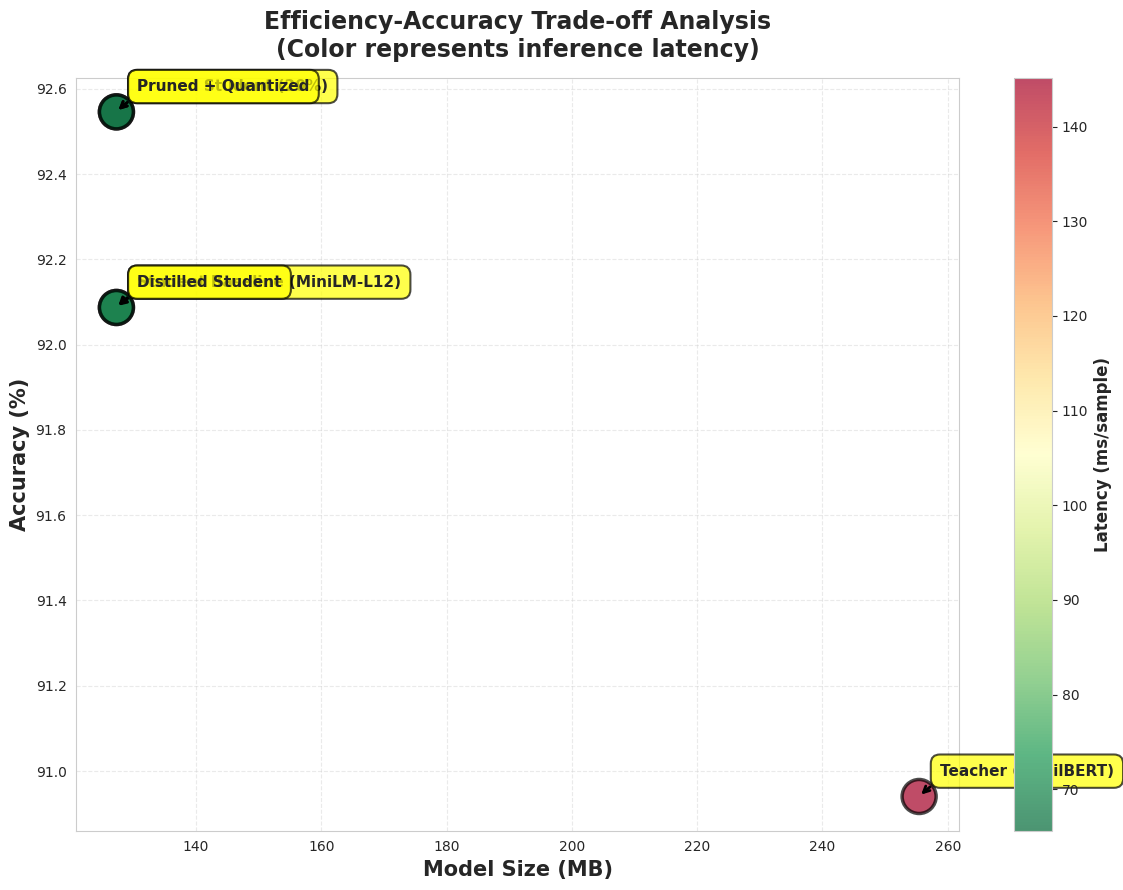

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png


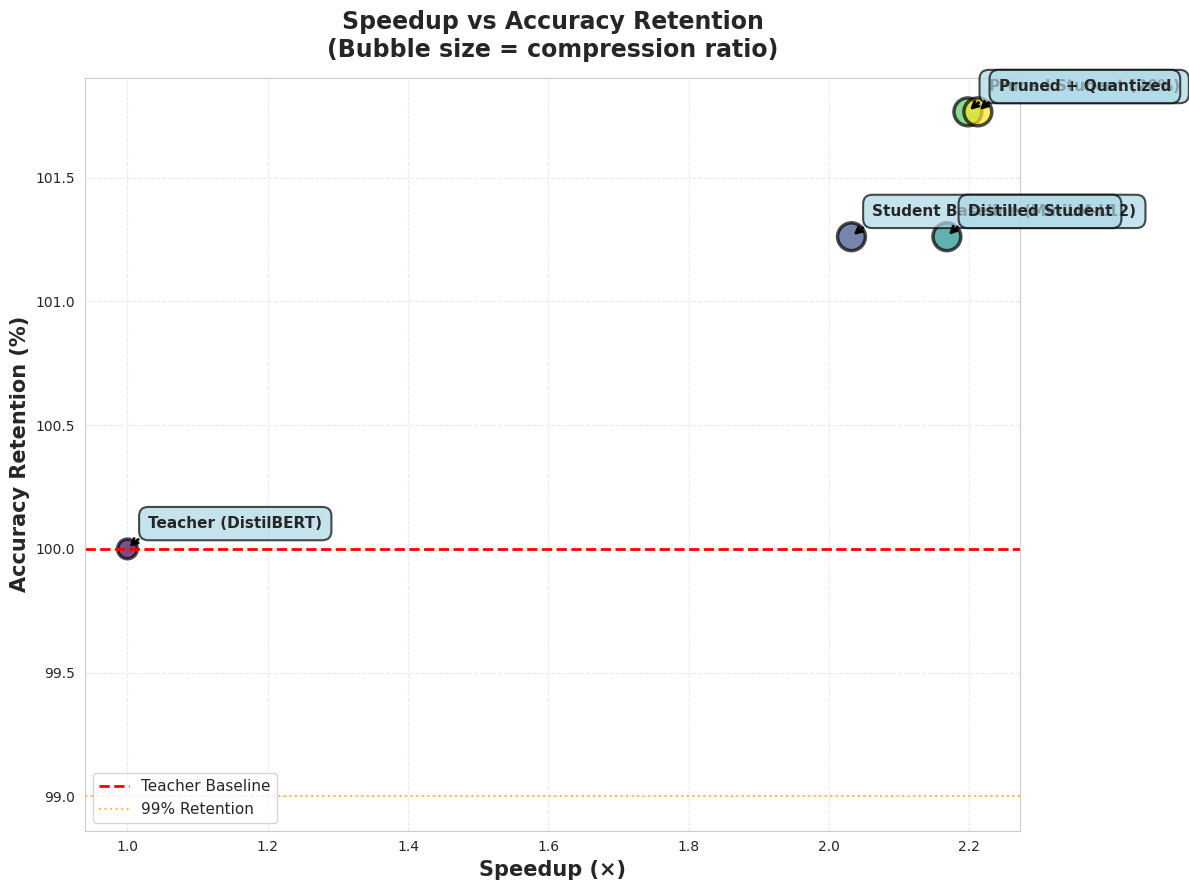

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png


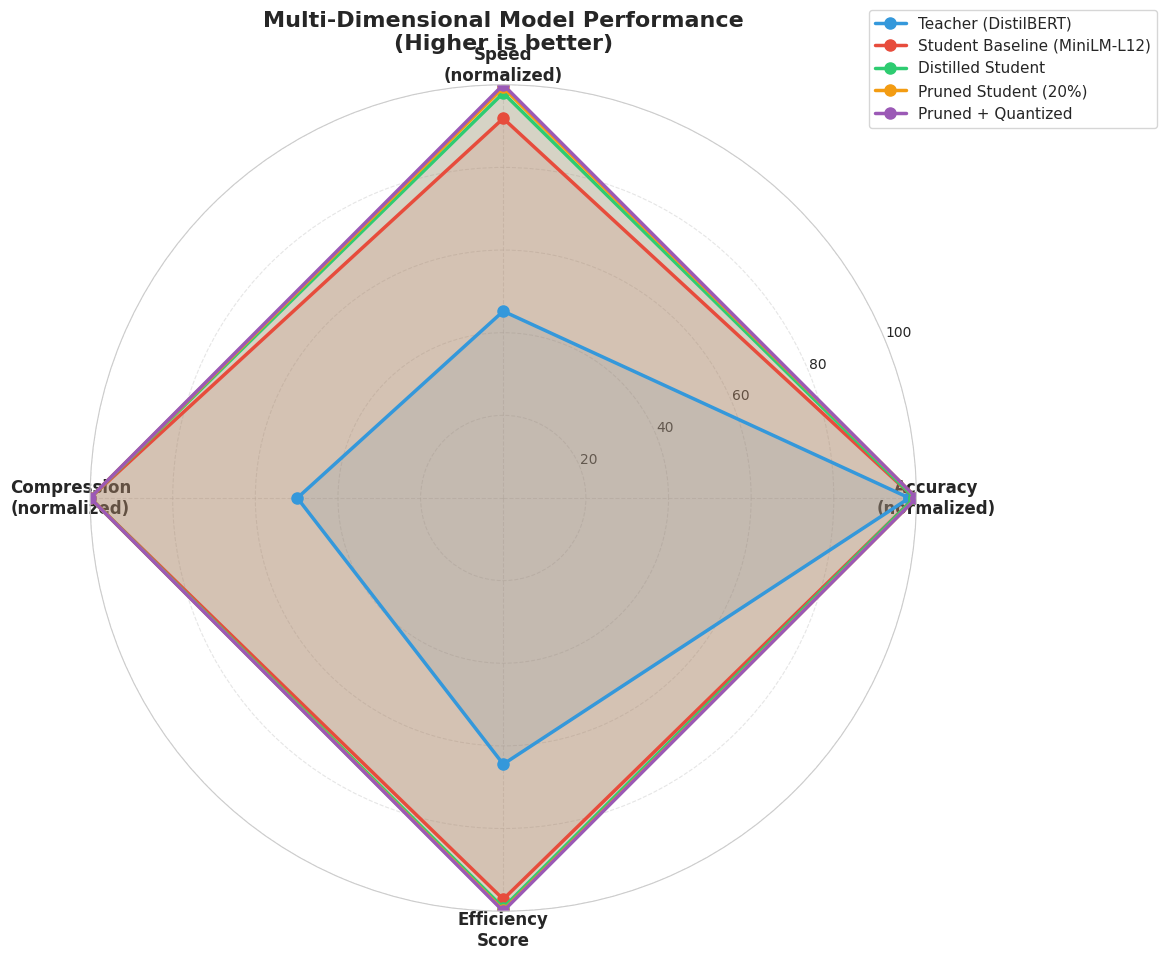

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png

💾 Results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
💾 Summary saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt

✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY!

Generated files:
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png
  📄 /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
  📄 /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt


In [17]:
# ===== COMPREHENSIVE VISUALIZATION FOR MODEL EVALUATION =====

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Create figures directory
fig_dir = f"{project_dir}/figures"
os.makedirs(fig_dir, exist_ok=True)

# Convert all_results to DataFrame
df_results = pd.DataFrame(all_results)

# Rename column for consistency
df_results['latency_mean_ms'] = df_results['avg_inference_time_ms']

# Recalculate compression ratios if not present (relative to teacher model)
if 'compression_ratio' not in df_results.columns or df_results['compression_ratio'].isna().any():
    teacher_size = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['size_MB'].values[0]
    df_results['compression_ratio'] = teacher_size / df_results['size_MB']

# Calculate speedup (relative to teacher)
teacher_latency = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['avg_inference_time_ms'].values[0]
df_results['speedup'] = teacher_latency / df_results['avg_inference_time_ms']

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(df_results.to_string(index=False))
print("="*70)

# ===== MAIN COMPARISON PLOT (2x2 Grid) =====
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('EdgeMIN: Model Compression & Optimization Results',
             fontsize=18, fontweight='bold', y=0.995)

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# Plot 1: Accuracy Comparison
axes[0, 0].bar(range(len(df_results)), df_results['accuracy'] * 100,
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 0].set_xticks(range(len(df_results)))
axes[0, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Model Accuracy on SST-2', fontsize=14, fontweight='bold', pad=10)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].set_ylim([max(85, df_results['accuracy'].min() * 100 - 2),
                      min(95, df_results['accuracy'].max() * 100 + 2)])

for i, v in enumerate(df_results['accuracy'] * 100):
    axes[0, 0].text(i, v + 0.3, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold')

# Plot 2: Model Size
axes[0, 1].bar(range(len(df_results)), df_results['size_MB'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 1].set_xticks(range(len(df_results)))
axes[0, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 1].set_ylabel('Model Size (MB)', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Model Size Comparison', fontsize=14, fontweight='bold', pad=10)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['size_MB']):
    axes[0, 1].text(i, v + df_results['size_MB'].max()*0.02,
                    f'{v:.1f} MB', ha='center', fontsize=10, fontweight='bold')

# Plot 3: Inference Latency
axes[1, 0].bar(range(len(df_results)), df_results['avg_inference_time_ms'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 0].set_xticks(range(len(df_results)))
axes[1, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 0].set_ylabel('Latency (ms/sample)', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Inference Latency (CPU)', fontsize=14, fontweight='bold', pad=10)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['avg_inference_time_ms']):
    axes[1, 0].text(i, v + df_results['avg_inference_time_ms'].max()*0.02,
                    f'{v:.2f} ms', ha='center', fontsize=10, fontweight='bold')

# Plot 4: Compression Ratio vs Teacher
axes[1, 1].bar(range(len(df_results)), df_results['compression_ratio'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
axes[1, 1].set_xticks(range(len(df_results)))
axes[1, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 1].set_ylabel('Compression Ratio (×)', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Size Reduction vs Teacher Model', fontsize=14, fontweight='bold', pad=10)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].legend(loc='upper left', fontsize=10)

for i, v in enumerate(df_results['compression_ratio']):
    axes[1, 1].text(i, v + df_results['compression_ratio'].max()*0.02,
                    f'{v:.2f}×', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{fig_dir}/comprehensive_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/comprehensive_comparison.png")

# ===== PARETO FRONTIER: ACCURACY vs SIZE =====
plt.figure(figsize=(12, 9))

# Create scatter plot with latency as color
scatter = plt.scatter(df_results['size_MB'],
                     df_results['accuracy'] * 100,
                     s=600,
                     alpha=0.7,
                     c=df_results['avg_inference_time_ms'],
                     cmap='RdYlGn_r',
                     edgecolors='black',
                     linewidth=2.5)

# Add model name annotations
for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['size_MB'], row['accuracy'] * 100),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='yellow',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.xlabel('Model Size (MB)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=15, fontweight='bold')
plt.title('Efficiency-Accuracy Trade-off Analysis\n(Color represents inference latency)',
          fontsize=17, fontweight='bold', pad=15)
cbar = plt.colorbar(scatter, label='Latency (ms/sample)')
cbar.set_label('Latency (ms/sample)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/pareto_frontier.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/pareto_frontier.png")

# ===== SPEEDUP vs ACCURACY RETENTION =====
plt.figure(figsize=(12, 9))

# Calculate accuracy retention percentage
teacher_acc = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['accuracy'].values[0]
df_results['accuracy_retention'] = (df_results['accuracy'] / teacher_acc) * 100

scatter2 = plt.scatter(df_results['speedup'],
                      df_results['accuracy_retention'],
                      s=df_results['compression_ratio']*200,
                      alpha=0.7,
                      c=range(len(df_results)),
                      cmap='viridis',
                      edgecolors='black',
                      linewidth=2.5)

for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['speedup'], row['accuracy_retention']),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='lightblue',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
plt.axhline(y=99, color='orange', linestyle=':', linewidth=1.5, label='99% Retention', alpha=0.7)
plt.xlabel('Speedup (×)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy Retention (%)', fontsize=15, fontweight='bold')
plt.title('Speedup vs Accuracy Retention\n(Bubble size = compression ratio)',
          fontsize=17, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='lower left')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/speedup_vs_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/speedup_vs_accuracy.png")

# ===== RADAR CHART: MULTI-DIMENSIONAL COMPARISON =====
from math import pi

categories = ['Accuracy\n(normalized)', 'Speed\n(normalized)',
              'Compression\n(normalized)', 'Efficiency\nScore']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Normalize metrics to 0-100 scale
df_results['norm_accuracy'] = (df_results['accuracy'] / df_results['accuracy'].max()) * 100
df_results['norm_speed'] = (df_results['speedup'] / df_results['speedup'].max()) * 100
df_results['norm_compression'] = (df_results['compression_ratio'] / df_results['compression_ratio'].max()) * 100
df_results['efficiency_score'] = (df_results['norm_accuracy'] + df_results['norm_speed'] +
                                   df_results['norm_compression']) / 3

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

for idx, row in df_results.iterrows():
    values = [row['norm_accuracy'], row['norm_speed'],
              row['norm_compression'], row['efficiency_score']]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2.5, label=row['model_name'],
            color=colors[idx], markersize=8)
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Multi-Dimensional Model Performance\n(Higher is better)',
             fontsize=16, fontweight='bold', pad=25)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig(f"{fig_dir}/radar_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/radar_comparison.png")

# ===== SAVE RESULTS TABLE =====
results_path = f"{project_dir}/evaluation_results.csv"
df_results.to_csv(results_path, index=False)
print(f"\n💾 Results saved to: {results_path}")

# Create summary table
summary_path = f"{project_dir}/evaluation_summary.txt"
with open(summary_path, 'w') as f:
    f.write("="*70 + "\n")
    f.write("EDGEMIN MODEL EVALUATION SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(df_results.to_string(index=False))
    f.write("\n\n" + "="*70 + "\n")
    f.write("KEY FINDINGS:\n")
    f.write("="*70 + "\n")

    best_acc = df_results.loc[df_results['accuracy'].idxmax()]
    smallest = df_results.loc[df_results['size_MB'].idxmin()]
    fastest = df_results.loc[df_results['latency_mean_ms'].idxmin()]
    best_ratio = df_results.loc[df_results['efficiency_score'].idxmax()]

    f.write(f"🏆 Highest Accuracy: {best_acc['model_name']} ({best_acc['accuracy']*100:.2f}%)\n")
    f.write(f"📦 Smallest Model: {smallest['model_name']} ({smallest['size_MB']:.1f} MB)\n")
    f.write(f"⚡ Fastest Inference: {fastest['model_name']} ({fastest['latency_mean_ms']:.2f} ms)\n")
    f.write(f"🎯 Best Overall Efficiency: {best_ratio['model_name']} (Score: {best_ratio['efficiency_score']:.1f})\n")

print(f"💾 Summary saved to: {summary_path}")

print("\n" + "="*70)
print("✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY!")
print("="*70)
print(f"\nGenerated files:")
print(f"  📊 {fig_dir}/comprehensive_comparison.png")
print(f"  📊 {fig_dir}/pareto_frontier.png")
print(f"  📊 {fig_dir}/speedup_vs_accuracy.png")
print(f"  📊 {fig_dir}/radar_comparison.png")
print(f"  📄 {results_path}")
print(f"  📄 {summary_path}")
print("="*70)

Latex font

In [9]:
# ===== RE-RUN EVALUATION WITH FINE-TUNED MODELS =====
import os
import sys
import time
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
sys.path.append(project_dir)



MODEL COMPARISON SUMMARY
                   model_name  params_M  accuracy  avg_inference_time_ms  avg_inference_time_batch_s    size_MB  total_samples  latency_mean_ms  compression_ratio  speedup
         Teacher (DistilBERT)  66.95501  0.909404             217.431832                    6.957819 255.425034            872       217.431832           1.000000 1.000000
Student Baseline (MiniLM-L12)  33.36077  0.920872             103.941682                    3.326134 127.283455            872       103.941682           2.006742 2.091864
            Distilled Student  33.36077  0.920872             101.531638                    3.249012 127.283455            872       101.531638           2.006742 2.141518
         Pruned Student (20%)  33.36077  0.925459             105.660584                    3.381139 127.283455            872       105.660584           2.006742 2.057833
           Pruned + Quantized  33.36077  0.925459             102.497011                    3.279904 127.283455   

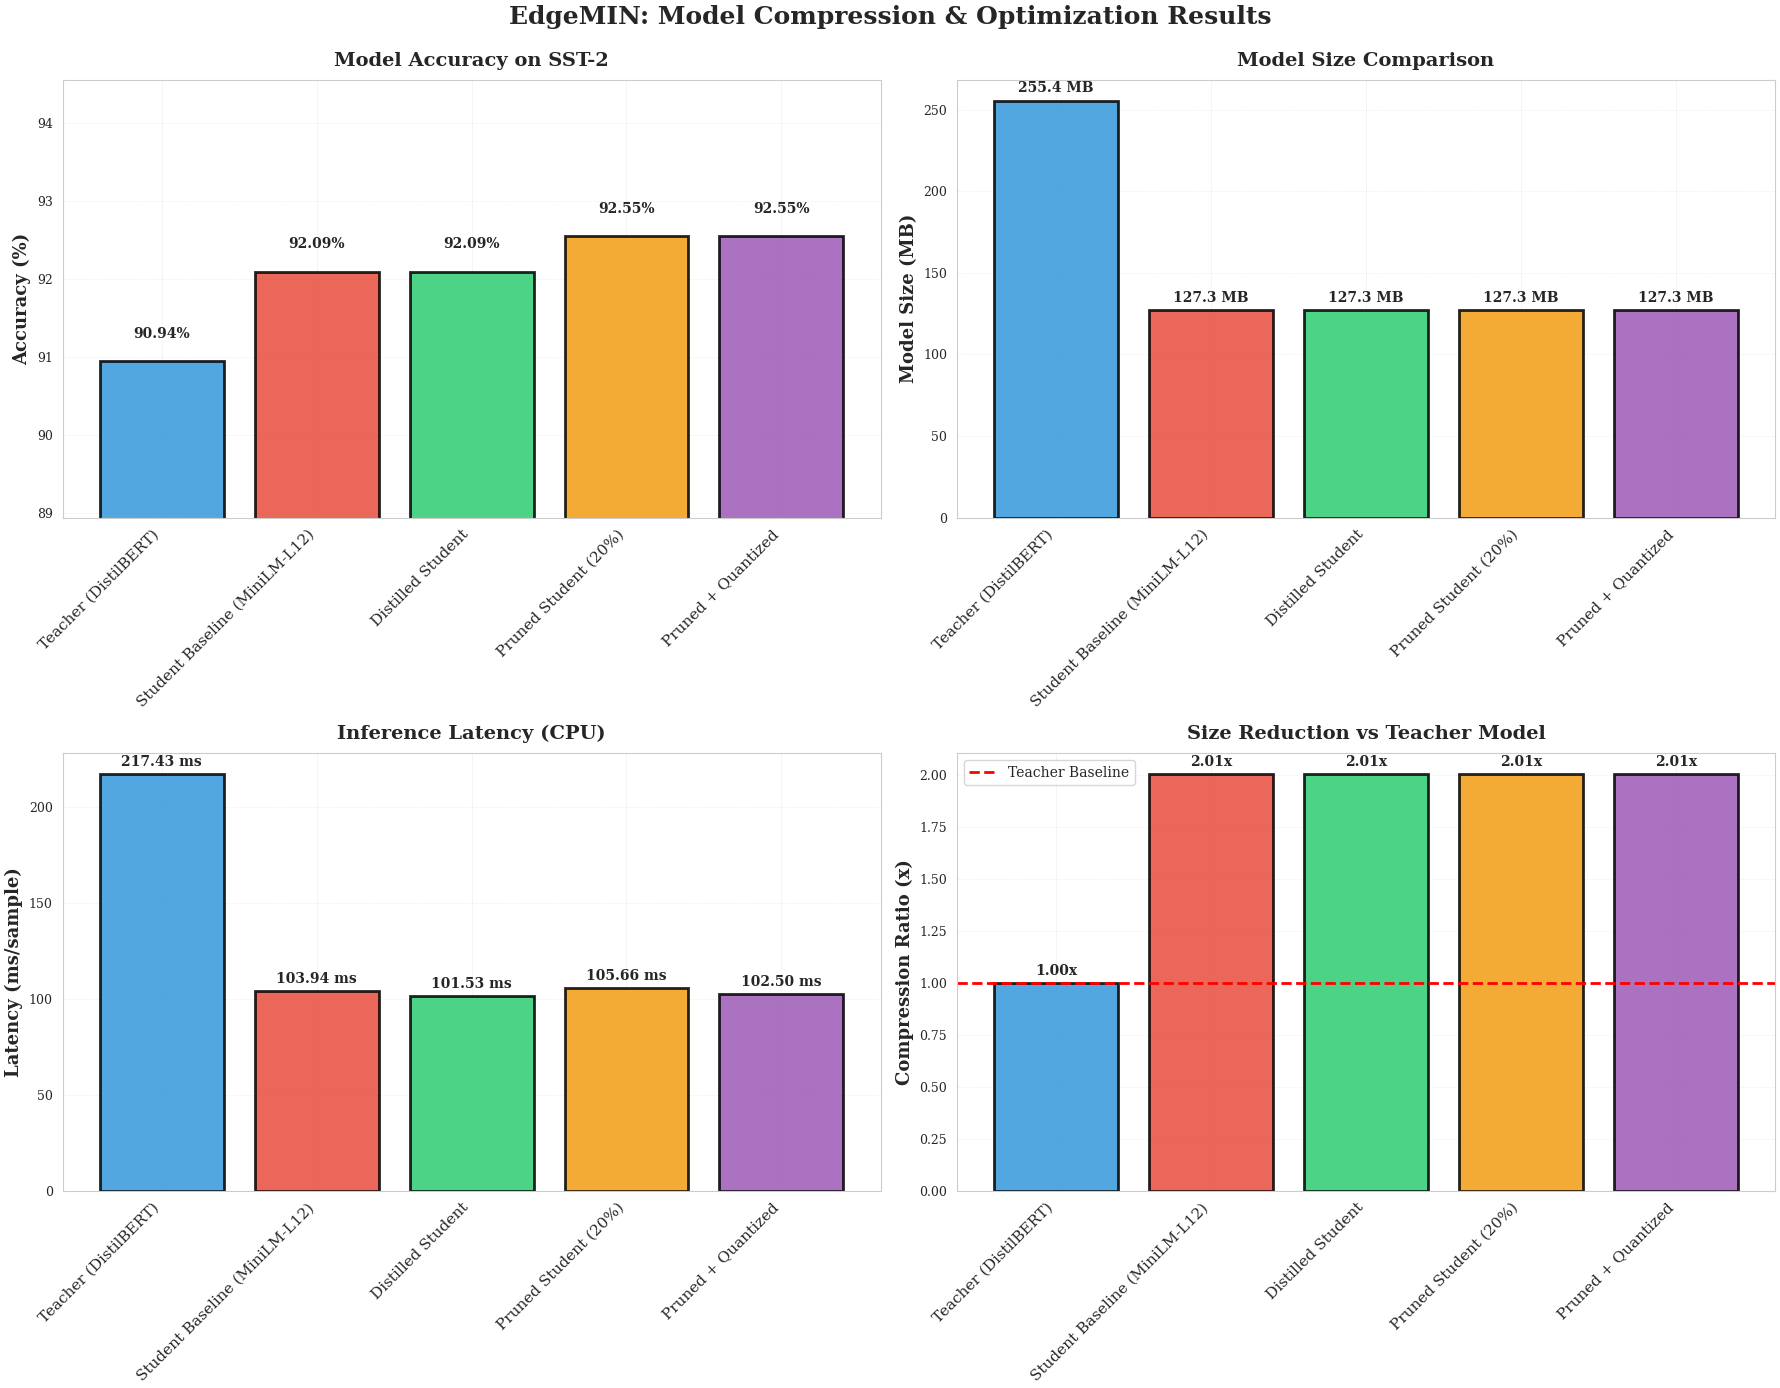

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png


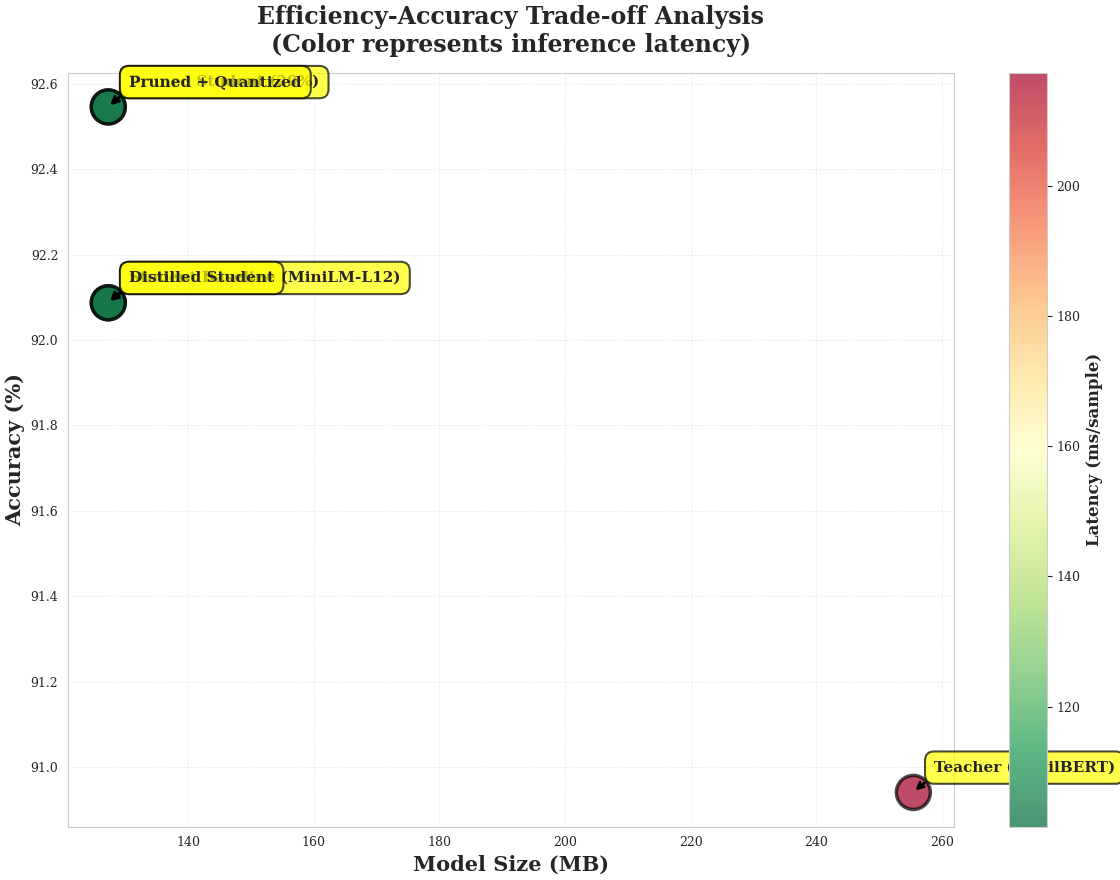

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png


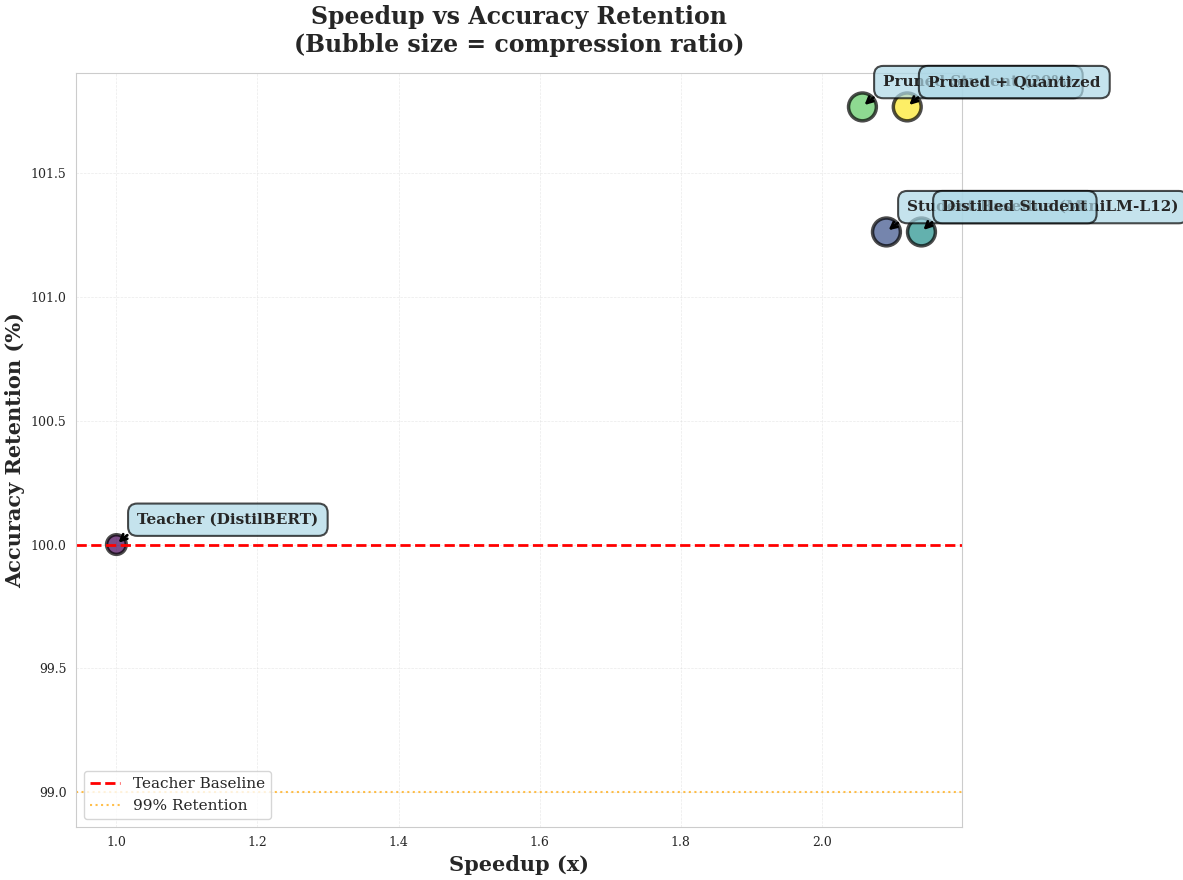

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png


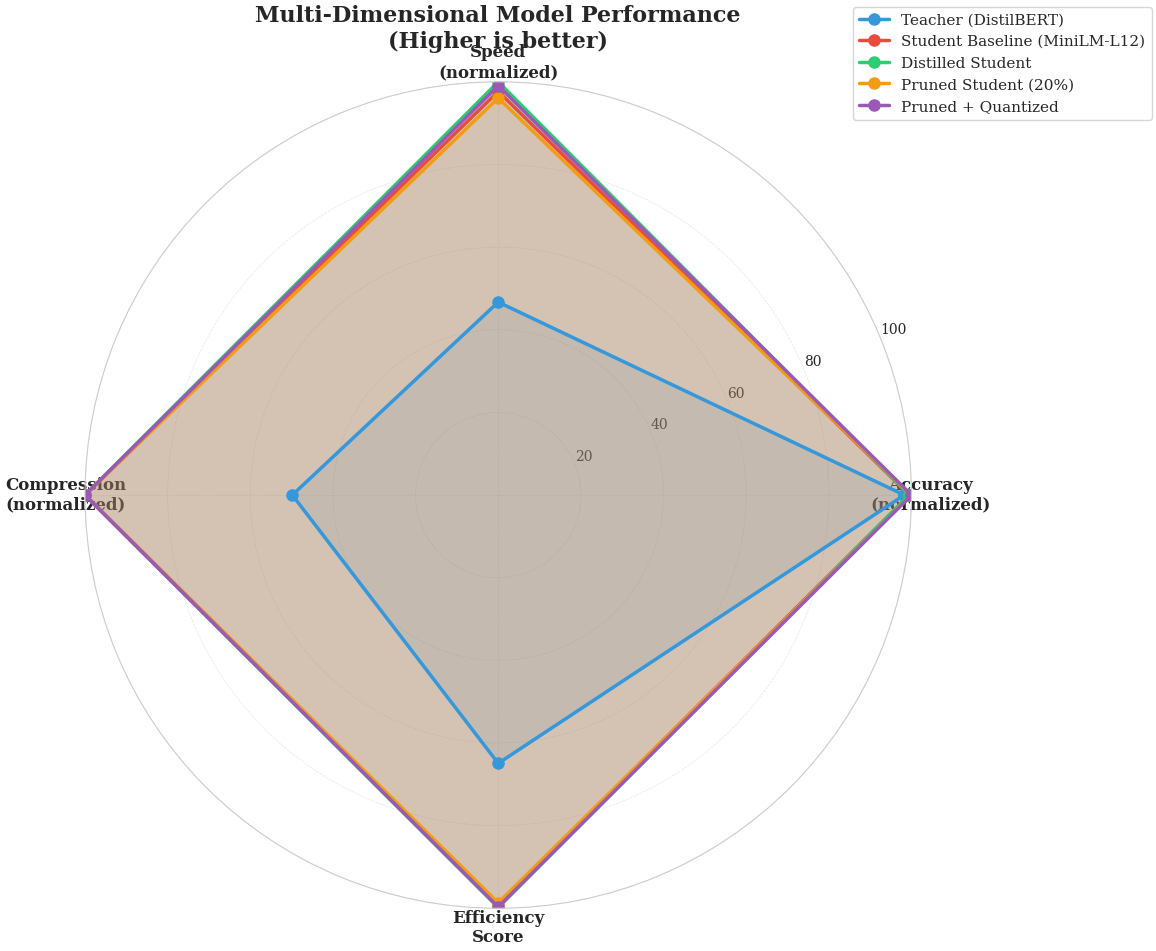

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png

Results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
Summary saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt

ALL VISUALIZATIONS GENERATED SUCCESSFULLY

Generated files:
  /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png
  /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png
  /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png
  /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png
  /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
  /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt


In [13]:
# ===== COMPREHENSIVE VISUALIZATION FOR MODEL EVALUATION =====

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from math import pi

# IMPORTANT: Disable LaTeX to avoid errors
plt.rcParams['text.usetex'] = False

# Set style with publication-quality fonts (no LaTeX required)
sns.set_style("whitegrid")

# Configure matplotlib for publication-quality figures
plt.rcParams.update({
    # Font settings - professional serif fonts
    "font.family": "serif",
    "font.serif": ["DejaVu Serif", "Times New Roman", "Georgia", "serif"],
    "mathtext.fontset": "dejavuserif",

    # Figure settings
    "figure.facecolor": "white",
    "axes.facecolor": "white",

    # Font sizes (conference paper standard)
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.titlesize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "figure.titlesize": 14,

    # Line widths
    "axes.linewidth": 0.8,
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.5,

    # Grid and saving settings
    "axes.grid": True,
    "grid.alpha": 0.3,
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.05,
})

# Create figures directory
fig_dir = f"{project_dir}/figures"
os.makedirs(fig_dir, exist_ok=True)

# Convert all_results to DataFrame
df_results = pd.DataFrame(all_results)

# Rename column for consistency
df_results['latency_mean_ms'] = df_results['avg_inference_time_ms']

# Recalculate compression ratios if not present
if 'compression_ratio' not in df_results.columns or df_results['compression_ratio'].isna().any():
    teacher_size = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['size_MB'].values[0]
    df_results['compression_ratio'] = teacher_size / df_results['size_MB']

# Calculate speedup
teacher_latency = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['avg_inference_time_ms'].values[0]
df_results['speedup'] = teacher_latency / df_results['avg_inference_time_ms']

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(df_results.to_string(index=False))
print("="*70)

# Define colors
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# ===== FIGURE 1: MAIN COMPARISON (2x2 Grid) =====
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('EdgeMIN: Model Compression & Optimization Results',
             fontsize=18, fontweight='bold', y=0.995)

# Plot 1: Accuracy
axes[0, 0].bar(range(len(df_results)), df_results['accuracy'] * 100,
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 0].set_xticks(range(len(df_results)))
axes[0, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Model Accuracy on SST-2', fontsize=14, fontweight='bold', pad=10)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].set_ylim([max(85, df_results['accuracy'].min() * 100 - 2),
                      min(95, df_results['accuracy'].max() * 100 + 2)])

for i, v in enumerate(df_results['accuracy'] * 100):
    axes[0, 0].text(i, v + 0.3, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold')

# Plot 2: Model Size
axes[0, 1].bar(range(len(df_results)), df_results['size_MB'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 1].set_xticks(range(len(df_results)))
axes[0, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 1].set_ylabel('Model Size (MB)', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Model Size Comparison', fontsize=14, fontweight='bold', pad=10)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['size_MB']):
    axes[0, 1].text(i, v + df_results['size_MB'].max()*0.02,
                    f'{v:.1f} MB', ha='center', fontsize=10, fontweight='bold')

# Plot 3: Inference Latency
axes[1, 0].bar(range(len(df_results)), df_results['avg_inference_time_ms'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 0].set_xticks(range(len(df_results)))
axes[1, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 0].set_ylabel('Latency (ms/sample)', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Inference Latency (CPU)', fontsize=14, fontweight='bold', pad=10)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['avg_inference_time_ms']):
    axes[1, 0].text(i, v + df_results['avg_inference_time_ms'].max()*0.02,
                    f'{v:.2f} ms', ha='center', fontsize=10, fontweight='bold')

# Plot 4: Compression Ratio
axes[1, 1].bar(range(len(df_results)), df_results['compression_ratio'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
axes[1, 1].set_xticks(range(len(df_results)))
axes[1, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 1].set_ylabel('Compression Ratio (x)', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Size Reduction vs Teacher Model', fontsize=14, fontweight='bold', pad=10)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].legend(loc='upper left', fontsize=10)

for i, v in enumerate(df_results['compression_ratio']):
    axes[1, 1].text(i, v + df_results['compression_ratio'].max()*0.02,
                    f'{v:.2f}x', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{fig_dir}/comprehensive_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/comprehensive_comparison.png")

# ===== FIGURE 2: PARETO FRONTIER =====
plt.figure(figsize=(12, 9))

scatter = plt.scatter(df_results['size_MB'],
                     df_results['accuracy'] * 100,
                     s=600,
                     alpha=0.7,
                     c=df_results['avg_inference_time_ms'],
                     cmap='RdYlGn_r',
                     edgecolors='black',
                     linewidth=2.5)

for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['size_MB'], row['accuracy'] * 100),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='yellow',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.xlabel('Model Size (MB)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=15, fontweight='bold')
plt.title('Efficiency-Accuracy Trade-off Analysis\n(Color represents inference latency)',
          fontsize=17, fontweight='bold', pad=15)
cbar = plt.colorbar(scatter, label='Latency (ms/sample)')
cbar.set_label('Latency (ms/sample)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/pareto_frontier.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/pareto_frontier.png")

# ===== FIGURE 3: SPEEDUP vs ACCURACY RETENTION =====
plt.figure(figsize=(12, 9))

teacher_acc = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['accuracy'].values[0]
df_results['accuracy_retention'] = (df_results['accuracy'] / teacher_acc) * 100

scatter2 = plt.scatter(df_results['speedup'],
                      df_results['accuracy_retention'],
                      s=df_results['compression_ratio']*200,
                      alpha=0.7,
                      c=range(len(df_results)),
                      cmap='viridis',
                      edgecolors='black',
                      linewidth=2.5)

for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['speedup'], row['accuracy_retention']),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='lightblue',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
plt.axhline(y=99, color='orange', linestyle=':', linewidth=1.5, label='99% Retention', alpha=0.7)
plt.xlabel('Speedup (x)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy Retention (%)', fontsize=15, fontweight='bold')
plt.title('Speedup vs Accuracy Retention\n(Bubble size = compression ratio)',
          fontsize=17, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='lower left')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/speedup_vs_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/speedup_vs_accuracy.png")

# ===== FIGURE 4: RADAR CHART =====
categories = ['Accuracy\n(normalized)', 'Speed\n(normalized)',
              'Compression\n(normalized)', 'Efficiency\nScore']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

df_results['norm_accuracy'] = (df_results['accuracy'] / df_results['accuracy'].max()) * 100
df_results['norm_speed'] = (df_results['speedup'] / df_results['speedup'].max()) * 100
df_results['norm_compression'] = (df_results['compression_ratio'] / df_results['compression_ratio'].max()) * 100
df_results['efficiency_score'] = (df_results['norm_accuracy'] + df_results['norm_speed'] +
                                   df_results['norm_compression']) / 3

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

for idx, row in df_results.iterrows():
    values = [row['norm_accuracy'], row['norm_speed'],
              row['norm_compression'], row['efficiency_score']]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2.5, label=row['model_name'],
            color=colors[idx], markersize=8)
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Multi-Dimensional Model Performance\n(Higher is better)',
             fontsize=16, fontweight='bold', pad=25)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig(f"{fig_dir}/radar_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/radar_comparison.png")

# ===== SAVE RESULTS =====
results_path = f"{project_dir}/evaluation_results.csv"
df_results.to_csv(results_path, index=False)
print(f"\nResults saved to: {results_path}")

summary_path = f"{project_dir}/evaluation_summary.txt"
with open(summary_path, 'w') as f:
    f.write("="*70 + "\n")
    f.write("EDGEMIN MODEL EVALUATION SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(df_results.to_string(index=False))
    f.write("\n\n" + "="*70 + "\n")
    f.write("KEY FINDINGS:\n")
    f.write("="*70 + "\n")

    best_acc = df_results.loc[df_results['accuracy'].idxmax()]
    smallest = df_results.loc[df_results['size_MB'].idxmin()]
    fastest = df_results.loc[df_results['latency_mean_ms'].idxmin()]
    best_ratio = df_results.loc[df_results['efficiency_score'].idxmax()]

    f.write(f"Highest Accuracy: {best_acc['model_name']} ({best_acc['accuracy']*100:.2f}%)\n")
    f.write(f"Smallest Model: {smallest['model_name']} ({smallest['size_MB']:.1f} MB)\n")
    f.write(f"Fastest Inference: {fastest['model_name']} ({fastest['latency_mean_ms']:.2f} ms)\n")
    f.write(f"Best Overall Efficiency: {best_ratio['model_name']} (Score: {best_ratio['efficiency_score']:.1f})\n")

print(f"Summary saved to: {summary_path}")

print("\n" + "="*70)
print("ALL VISUALIZATIONS GENERATED SUCCESSFULLY")
print("="*70)
print(f"\nGenerated files:")
print(f"  {fig_dir}/comprehensive_comparison.png")
print(f"  {fig_dir}/pareto_frontier.png")
print(f"  {fig_dir}/speedup_vs_accuracy.png")
print(f"  {fig_dir}/radar_comparison.png")
print(f"  {results_path}")
print(f"  {summary_path}")
print("="*70)

# Testing with benchmarks

Model size

In [11]:
# ===== Enhanced Model Size Measurement =====

def get_detailed_model_size(model_path, model):
    """
    Get detailed size breakdown
    """
    import os

    # Method 1: Actual file size on disk
    model_file = None
    for filename in ["model.safetensors", "pytorch_model.bin"]:
        filepath = os.path.join(model_path, filename)
        if os.path.exists(filepath):
            model_file = filepath
            break

    file_size_mb = 0
    if model_file:
        file_size_mb = os.path.getsize(model_file) / (1024**2)

    # Method 2: Parameter count (theoretical size)
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    # Calculate sizes for different precisions
    fp32_size_mb = total_params * 4 / (1024**2)  # 4 bytes per param
    fp16_size_mb = total_params * 2 / (1024**2)  # 2 bytes per param
    int8_size_mb = total_params * 1 / (1024**2)  # 1 byte per param

    return {
        "file_size_MB": file_size_mb,
        "total_params": total_params,
        "total_params_M": total_params / 1e6,
        "trainable_params": trainable_params,
        "fp32_theoretical_MB": fp32_size_mb,
        "fp16_theoretical_MB": fp16_size_mb,
        "int8_theoretical_MB": int8_size_mb
    }

# Usage example
model_path = f"{project_dir}/models/teacher_finetuned"
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)

size_info = get_detailed_model_size(model_path, model)
print(size_info)

{'file_size_MB': 255.42503356933594, 'total_params': 66955010, 'total_params_M': 66.95501, 'trainable_params': 66955010, 'fp32_theoretical_MB': 255.41309356689453, 'fp16_theoretical_MB': 127.70654678344727, 'int8_theoretical_MB': 63.85327339172363}


Inference latency

In [12]:
# ===== Enhanced Latency Measurement =====

def measure_latency_detailed(model, tokenizer, sample_texts, device="cpu", num_warmup=10, num_runs=100):
    """
    Measure cold start and warm inference latency
    """
    import time
    import torch

    model.eval()
    model.to(device)

    # Cold start (first inference, includes loading overhead)
    print("Measuring cold start latency...")
    cold_start_times = []

    for i in range(5):  # 5 cold starts
        # Clear cache to simulate cold start
        if device == "cuda":
            torch.cuda.empty_cache()

        text = sample_texts[i % len(sample_texts)]
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)

        start = time.time()
        with torch.no_grad():
            _ = model(**inputs)
        cold_time = (time.time() - start) * 1000  # ms
        cold_start_times.append(cold_time)

    # Warm-up runs
    print("Warming up...")
    for _ in range(num_warmup):
        inputs = tokenizer(sample_texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

    # Warm inference (steady state)
    print("Measuring warm inference latency...")
    warm_times = []

    for text in sample_texts[:num_runs]:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)

        start = time.time()
        with torch.no_grad():
            _ = model(**inputs)
        warm_time = (time.time() - start) * 1000  # ms
        warm_times.append(warm_time)

    return {
        "cold_start_mean_ms": np.mean(cold_start_times),
        "cold_start_std_ms": np.std(cold_start_times),
        "warm_mean_ms": np.mean(warm_times),
        "warm_std_ms": np.std(warm_times),
        "warm_median_ms": np.median(warm_times),
        "warm_p95_ms": np.percentile(warm_times, 95),
        "warm_p99_ms": np.percentile(warm_times, 99)
    }

# Usage
dataset = load_dataset("glue", "sst2", split="validation")
texts = [ex["sentence"] for ex in dataset.select(range(100))]

latency_info = measure_latency_detailed(model, tokenizer, texts, device="cpu")
print(latency_info)

Measuring cold start latency...
Warming up...
Measuring warm inference latency...
{'cold_start_mean_ms': np.float64(92.48666763305664), 'cold_start_std_ms': np.float64(62.39115912321953), 'warm_mean_ms': np.float64(66.04520320892334), 'warm_std_ms': np.float64(10.43888308139604), 'warm_median_ms': np.float64(64.69976902008057), 'warm_p95_ms': np.float64(81.70708417892456), 'warm_p99_ms': np.float64(99.29273605346681)}


Throughput (Samples/Second)

In [18]:
# ===== Throughput Measurement =====

def measure_throughput(model, tokenizer, sample_texts, device="cpu", batch_sizes=[1, 4, 8, 16, 32]):
    """
    Measure throughput at different batch sizes
    """
    import time
    import torch

    model.eval()
    model.to(device)

    results = []

    for batch_size in batch_sizes:
        print(f"\nTesting batch size: {batch_size}")

        # Prepare batches
        num_batches = min(20, len(sample_texts) // batch_size)
        total_samples = 0
        total_time = 0

        for i in range(num_batches):
            batch_texts = sample_texts[i*batch_size:(i+1)*batch_size]

            inputs = tokenizer(
                batch_texts,
                return_tensors="pt",
                truncation=True,
                max_length=128,
                padding=True
            ).to(device)

            start = time.time()
            with torch.no_grad():
                _ = model(**inputs)

            batch_time = time.time() - start
            total_time += batch_time
            total_samples += len(batch_texts)

        throughput = total_samples / total_time
        latency_per_sample = (total_time / total_samples) * 1000  # ms

        results.append({
            "batch_size": batch_size,
            "throughput_samples_per_sec": throughput,
            "latency_per_sample_ms": latency_per_sample,
            "total_samples": total_samples
        })

        print(f"  Throughput: {throughput:.2f} samples/sec")
        print(f"  Latency: {latency_per_sample:.2f} ms/sample")

    return results

# Usage
throughput_results = measure_throughput(model, tokenizer, texts, device="cpu")

# Convert to dataframe
df_throughput = pd.DataFrame(throughput_results)
print("\nThroughput Analysis:")
print(df_throughput)


Testing batch size: 1
  Throughput: 14.69 samples/sec
  Latency: 68.06 ms/sample

Testing batch size: 4
  Throughput: 26.27 samples/sec
  Latency: 38.06 ms/sample

Testing batch size: 8
  Throughput: 30.35 samples/sec
  Latency: 32.94 ms/sample

Testing batch size: 16
  Throughput: 31.14 samples/sec
  Latency: 32.12 ms/sample

Testing batch size: 32
  Throughput: 24.87 samples/sec
  Latency: 40.21 ms/sample

Throughput Analysis:
   batch_size  throughput_samples_per_sec  latency_per_sample_ms  \
0           1                   14.693797              68.055928   
1           4                   26.272470              38.062656   
2           8                   30.355000              32.943502   
3          16                   31.135923              32.117243   
4          32                   24.869315              40.210195   

   total_samples  
0             20  
1             80  
2             96  
3             96  
4             96  


**Peak** RAM (Memory Usage)

In [19]:
# ===== Memory Measurement =====

def measure_memory_usage(model, tokenizer, sample_texts, device="cpu"):
    """
    Measure peak memory usage during inference
    """
    import torch
    import psutil
    import os

    model.eval()
    model.to(device)

    if device == "cuda" and torch.cuda.is_available():
        # GPU Memory
        torch.cuda.empty_cache()
        torch.cuda.reset_peak_memory_stats()

        # Run inference
        inputs = tokenizer(sample_texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

        peak_gpu_mb = torch.cuda.max_memory_allocated() / (1024**2)
        current_gpu_mb = torch.cuda.memory_allocated() / (1024**2)

        return {
            "device": "GPU",
            "peak_memory_MB": peak_gpu_mb,
            "current_memory_MB": current_gpu_mb
        }
    else:
        # CPU Memory
        import tracemalloc

        tracemalloc.start()

        # Get baseline
        baseline = tracemalloc.get_traced_memory()[0] / (1024**2)

        # Run inference
        inputs = tokenizer(sample_texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        peak_mb = peak / (1024**2)
        current_mb = current / (1024**2)

        # Also get system-level memory
        process = psutil.Process(os.getpid())
        system_memory_mb = process.memory_info().rss / (1024**2)

        return {
            "device": "CPU",
            "peak_memory_MB": peak_mb,
            "current_memory_MB": current_mb,
            "system_memory_MB": system_memory_mb
        }

# Usage
memory_info = measure_memory_usage(model, tokenizer, texts, device="cpu")
print(memory_info)

{'device': 'CPU', 'peak_memory_MB': 0.0114898681640625, 'current_memory_MB': 0.0048980712890625, 'system_memory_MB': 2657.09375}


FLOPs (Computational Cost)

In [20]:
# ===== FLOPs Measurement =====

def measure_flops(model, tokenizer, sample_text, device="cpu"):
    """
    Measure FLOPs using profiler
    """
    import torch
    from torch.profiler import profile, ProfilerActivity

    model.eval()
    model.to(device)

    inputs = tokenizer(sample_text, return_tensors="pt", truncation=True, max_length=128).to(device)

    # Profile FLOPs
    with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
        with torch.no_grad():
            _ = model(**inputs)

    # Get FLOPs from profiler
    total_flops = sum([item.flops for item in prof.key_averages() if item.flops is not None])

    return {
        "total_flops": total_flops,
        "flops_billions": total_flops / 1e9,
        "flops_millions": total_flops / 1e6
    }

# Alternative: Use thop library for more detailed FLOPs
def measure_flops_thop(model, tokenizer, sample_text, device="cpu"):
    """
    Measure FLOPs using thop library (more accurate)
    """
    try:
        from thop import profile as thop_profile

        model.eval()
        model.to(device)

        inputs = tokenizer(sample_text, return_tensors="pt", truncation=True, max_length=128).to(device)

        # Count FLOPs
        flops, params = thop_profile(model, inputs=(inputs['input_ids'], inputs['attention_mask']))

        return {
            "total_flops": flops,
            "flops_billions": flops / 1e9,
            "flops_millions": flops / 1e6,
            "params": params
        }
    except ImportError:
        print("⚠️ thop library not installed. Install with: pip install thop")
        return None

# Install thop first
!pip install thop -q

# Usage
flops_info = measure_flops(model, tokenizer, texts[0], device="cpu")
print(flops_info)

# Or use thop (more accurate)
flops_thop = measure_flops_thop(model, tokenizer, texts[0], device="cpu")
print(flops_thop)

{'total_flops': 0, 'flops_billions': 0.0, 'flops_millions': 0.0}
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
{'total_flops': 510678528.0, 'flops_billions': 0.510678528, 'flops_millions': 510.678528, 'params': 43120898.0}


# Teritary Metrics

Energy Consumption :- Using codecarbon

In [ ]:
# ===== Energy Consumption Measurement =====

# Install codecarbon
!pip install codecarbon -q

from codecarbon import EmissionsTracker

def measure_energy_consumption(model, tokenizer, sample_texts, device="cpu", num_runs=100):
    """
    Measure energy consumption during inference
    """
    import torch

    model.eval()
    model.to(device)

    # Start tracking emissions
    tracker = EmissionsTracker(project_name="model_inference")
    tracker.start()

    # Run inference
    for text in sample_texts[:num_runs]:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

    # Stop tracking
    emissions = tracker.stop()

    # Get energy consumed
    energy_kwh = tracker.final_emissions_data.energy_consumed

    return {
        "total_energy_kwh": energy_kwh,
        "energy_per_sample_wh": (energy_kwh * 1000) / num_runs,  # Watt-hours per sample
        "co2_emissions_kg": emissions,
        "num_samples": num_runs
    }

# Usage
energy_info = measure_energy_consumption(model, tokenizer, texts, device="cpu", num_runs=100)
print(energy_info)

Measuring robustness

In [21]:
# ===== Robustness Testing =====

def test_robustness(model, tokenizer, sample_texts, device="cpu"):
    """
    Test model robustness with simple perturbations
    """
    import torch
    import random

    model.eval()
    model.to(device)

    results = {
        "original_correct": 0,
        "typo_correct": 0,
        "synonym_correct": 0,
        "total": 0
    }

    # Load dataset with labels
    dataset = load_dataset("glue", "sst2", split="validation")

    for i, example in enumerate(dataset.select(range(100))):
        text = example["sentence"]
        true_label = example["label"]

        # Test 1: Original text
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=-1).item()

        if pred == true_label:
            results["original_correct"] += 1

        # Test 2: Add typos (swap random characters)
        words = text.split()
        if len(words) > 2:
            idx = random.randint(0, len(words)-1)
            word = list(words[idx])
            if len(word) > 3:
                # Swap two characters
                pos1, pos2 = random.sample(range(len(word)), 2)
                word[pos1], word[pos2] = word[pos2], word[pos1]
                words[idx] = ''.join(word)

            perturbed_text = ' '.join(words)

            inputs = tokenizer(perturbed_text, return_tensors="pt", truncation=True, max_length=128).to(device)
            with torch.no_grad():
                outputs = model(**inputs)
                pred = torch.argmax(outputs.logits, dim=-1).item()

            if pred == true_label:
                results["typo_correct"] += 1

        # Test 3: Simple synonym replacement
        # (simplified - replace "good" with "great", "bad" with "terrible")
        synonym_text = text.replace("good", "great").replace("bad", "terrible")

        inputs = tokenizer(synonym_text, return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=-1).item()

        if pred == true_label:
            results["synonym_correct"] += 1

        results["total"] += 1

    # Calculate robustness scores
    return {
        "original_accuracy": results["original_correct"] / results["total"],
        "typo_robustness": results["typo_correct"] / results["total"],
        "synonym_robustness": results["synonym_correct"] / results["total"],
        "avg_robustness": (results["typo_correct"] + results["synonym_correct"]) / (2 * results["total"])
    }

# Usage
robustness_info = test_robustness(model, tokenizer, texts, device="cpu")
print(robustness_info)

{'original_accuracy': 0.93, 'typo_robustness': 0.91, 'synonym_robustness': 0.93, 'avg_robustness': 0.92}


Run all metrics and save them.

In [22]:
# ===== COMPLETE COMPREHENSIVE EVALUATION =====

def complete_model_evaluation(model_path, model_name, device="cpu"):
    """
    Measure ALL metrics for a model
    """
    import torch
    from transformers import AutoModelForSequenceClassification, AutoTokenizer
    from datasets import load_dataset

    print(f"\n{'='*70}")
    print(f"COMPLETE EVALUATION: {model_name}")
    print(f"{'='*70}")

    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2, ignore_mismatched_sizes=True)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)

    # Load sample data
    dataset = load_dataset("glue", "sst2", split="validation")
    texts = [ex["sentence"] for ex in dataset.select(range(200))]

    results = {"model_name": model_name}

    # 1. Model Size
    print("\n1️⃣ Measuring model size...")
    size_info = get_detailed_model_size(model_path, model)
    results.update(size_info)

    # 2. Accuracy (run on validation set)
    print("2️⃣ Measuring accuracy...")
    # Use your existing accuracy measurement

    # 3. Latency
    print("3️⃣ Measuring latency...")
    latency_info = measure_latency_detailed(model, tokenizer, texts, device)
    results.update(latency_info)

    # 4. Throughput
    print("4️⃣ Measuring throughput...")
    throughput_results = measure_throughput(model, tokenizer, texts, device, batch_sizes=[1, 8, 32])
    results["throughput_optimal"] = max([r["throughput_samples_per_sec"] for r in throughput_results])

    # 5. Memory
    print("5️⃣ Measuring memory...")
    memory_info = measure_memory_usage(model, tokenizer, texts, device)
    results.update(memory_info)

    # 6. FLOPs
    print("6️⃣ Measuring FLOPs...")
    flops_info = measure_flops(model, tokenizer, texts[0], device)
    results.update(flops_info)

    # # 7. Energy (optional)
    # print("7️⃣ Measuring energy consumption...")
    # try:
    #     energy_info = measure_energy_consumption(model, tokenizer, texts[:50], device, num_runs=50)
    #     results.update(energy_info)
    # except:
    #     print("  ⚠️ Energy measurement skipped")

    # 8. Robustness (optional)
    print("8️⃣ Testing robustness...")
    try:
        robustness_info = test_robustness(model, tokenizer, texts, device)
        results.update(robustness_info)
    except:
        print("  ⚠️ Robustness testing skipped")

    print("\n✅ Complete evaluation finished!")
    return results

# Run on all models
all_complete_results = []

for model_info in available_models:
    result = complete_model_evaluation(
        model_path=model_info["path"],
        model_name=model_info["name"],
        device="cpu"
    )
    all_complete_results.append(result)

# Save complete results
df_complete = pd.DataFrame(all_complete_results)
df_complete.to_csv(f"{project_dir}/results/complete_metrics.csv", index=False)

print("\n✅ All metrics saved!")


COMPLETE EVALUATION: Teacher (DistilBERT)

1️⃣ Measuring model size...
2️⃣ Measuring accuracy...
3️⃣ Measuring latency...
Measuring cold start latency...
Warming up...
Measuring warm inference latency...
4️⃣ Measuring throughput...

Testing batch size: 1
  Throughput: 15.53 samples/sec
  Latency: 64.38 ms/sample

Testing batch size: 8
  Throughput: 29.58 samples/sec
  Latency: 33.81 ms/sample

Testing batch size: 32
  Throughput: 22.62 samples/sec
  Latency: 44.21 ms/sample
5️⃣ Measuring memory...
6️⃣ Measuring FLOPs...
8️⃣ Testing robustness...

✅ Complete evaluation finished!

COMPLETE EVALUATION: Student Baseline (MiniLM-L12)

1️⃣ Measuring model size...
2️⃣ Measuring accuracy...
3️⃣ Measuring latency...
Measuring cold start latency...
Warming up...
Measuring warm inference latency...
4️⃣ Measuring throughput...

Testing batch size: 1
  Throughput: 31.43 samples/sec
  Latency: 31.82 ms/sample

Testing batch size: 8
  Throughput: 52.90 samples/sec
  Latency: 18.90 ms/sample

Testing

Visualizing the above metrics

Memory usage

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/memory_comparison.png


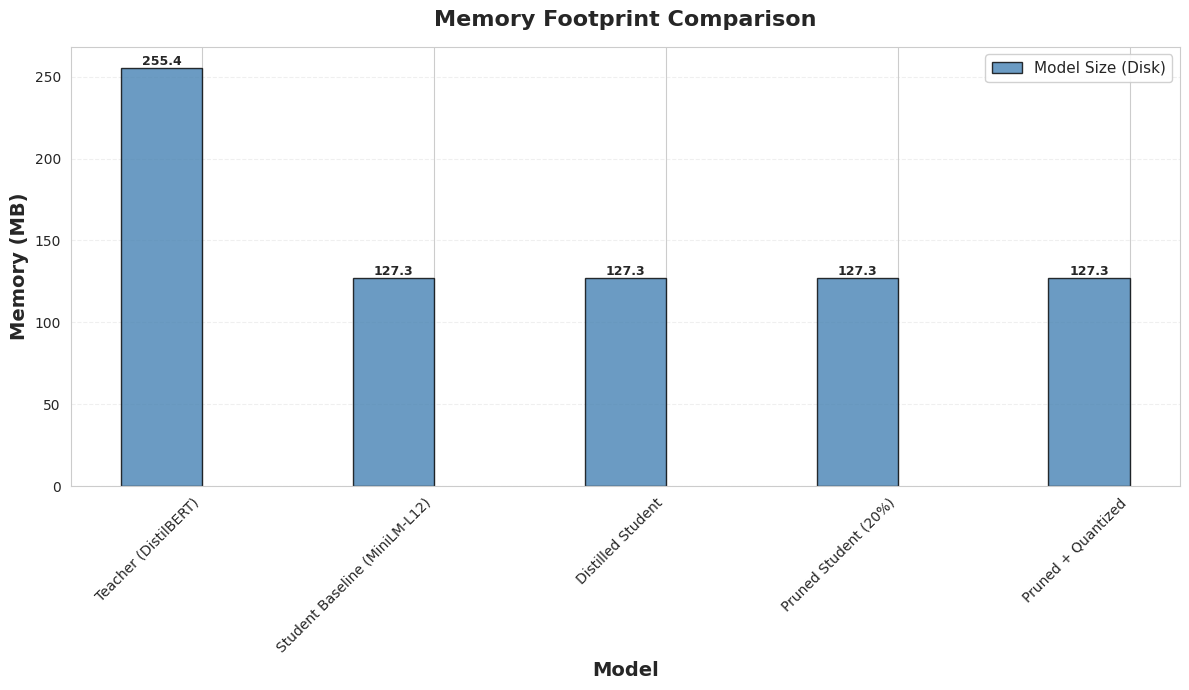

In [24]:
# ===== VIZ 5: MEMORY USAGE =====

def plot_memory_comparison(df_results, save_path=None):
    """
    Stacked bar chart: Model size vs Peak memory
    """
    fig, ax = plt.subplots(figsize=(12, 7))

    x = range(len(df_results))
    width = 0.35

    # Model size (disk)
    bars1 = ax.bar(x, df_results['size_MB'], width,
                   label='Model Size (Disk)', color='steelblue', alpha=0.8, edgecolor='black')

    # Peak memory (runtime) - if available
    if 'peak_memory_MB' in df_results.columns:
        bars2 = ax.bar([i + width for i in x], df_results['peak_memory_MB'], width,
                       label='Peak Memory (Runtime)', color='coral', alpha=0.8, edgecolor='black')

    ax.set_xlabel('Model', fontsize=14, fontweight='bold')
    ax.set_ylabel('Memory (MB)', fontsize=14, fontweight='bold')
    ax.set_title('Memory Footprint Comparison', fontsize=16, fontweight='bold', pad=15)
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=10)
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add value labels
    for bars in [bars1, bars2] if 'peak_memory_MB' in df_results.columns else [bars1]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Usage
plot_memory_comparison(df_results, save_path=f"{fig_dir}/memory_comparison.png")

# ===== VIZ 4: THROUGHPUT VS BATCH SIZE =====

In [26]:
# ===== VIZ 4: THROUGHPUT VS BATCH SIZE =====

def plot_throughput_analysis(throughput_results_dict, save_path=None):
    """
    Line plot: Throughput vs Batch Size for each model

    Args:
        throughput_results_dict: Dict with model names as keys,
                                 list of throughput dicts as values
    """
    fig, ax = plt.subplots(figsize=(12, 7))

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    markers = ['o', 's', '^', 'D', 'v']

    for i, (model_name, results) in enumerate(throughput_results_dict.items()):
        batch_sizes = [r['batch_size'] for r in results]
        throughputs = [r['throughput_samples_per_sec'] for r in results]

        ax.plot(batch_sizes, throughputs, marker=markers[i], markersize=10,
                linewidth=2.5, label=model_name, color=colors[i], alpha=0.8)

    ax.set_xlabel('Batch Size', fontsize=14, fontweight='bold')
    ax.set_ylabel('Throughput (samples/sec)', fontsize=14, fontweight='bold')
    ax.set_title('Throughput vs Batch Size', fontsize=16, fontweight='bold', pad=15)
    ax.set_xscale('log', base=2)
    ax.grid(True, alpha=0.3, which='both', linestyle='--')
    ax.legend(fontsize=11, framealpha=0.9, loc='upper left')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Example usage (you need to run throughput measurements first)
# throughput_dict = {
#     "Teacher": teacher_throughput_results,
#     "Student": student_throughput_results,
#     ...
# }
plot_throughput_analysis(throughput_dict, save_path=f"{fig_dir}/throughput_analysis.png")

NameError: name 'throughput_dict' is not defined

❌ Error with Teacher (DistilBERT): measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Student Baseline: measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Distilled Student: measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Pruned Student: measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Pruned + Quantized: measure_throughput() got an unexpected keyword argument 'model_path'

✅ Measured throughput for 0 models


/tmp/ipython-input-2581208998.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11, framealpha=0.9, loc='upper left')


✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/throughput_analysis.png


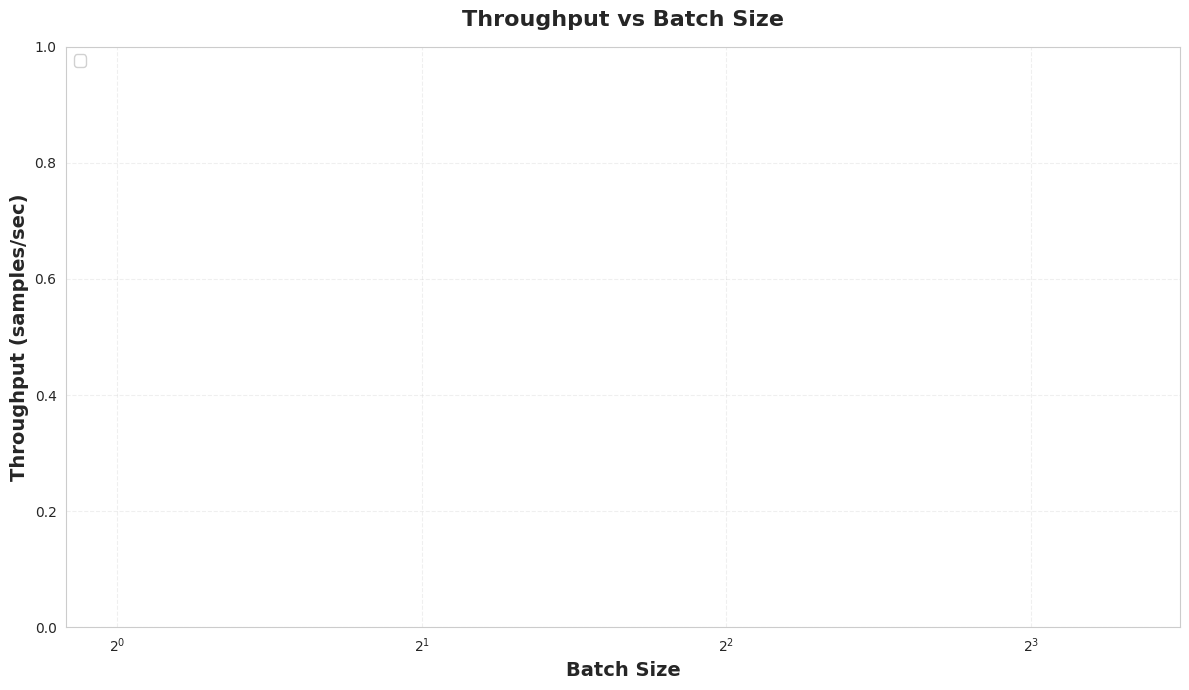


💾 Throughput data saved to: /content/drive/MyDrive/EdgeMIN_Project/throughput_results.csv

THROUGHPUT SUMMARY
Empty DataFrame
Columns: []
Index: []


In [27]:
throughput_results_dict = {}

models_to_test = [
    {"path": f"{project_dir}/models/teacher_finetuned", "name": "Teacher (DistilBERT)"},
    {"path": f"{project_dir}/models/student_finetuned", "name": "Student Baseline"},
    {"path": f"{project_dir}/models/distilled_student_finetuned", "name": "Distilled Student"},
    {"path": f"{project_dir}/models/pruned_student_finetuned", "name": "Pruned Student"},
    {"path": f"{project_dir}/models/pruned_quantized_student", "name": "Pruned + Quantized"}
]

batch_sizes_to_test = [1, 2, 4, 8, 16, 32]

for model_info in models_to_test:
    if os.path.exists(model_info["path"]):
        try:
            results = measure_throughput(
                model_path=model_info["path"],
                model_name=model_info["name"],
                batch_sizes=batch_sizes_to_test,
                num_samples=1000,  # Use 1000 samples for testing
                device='cpu'
            )
            throughput_results_dict[model_info["name"]] = results

        except Exception as e:
            print(f"❌ Error with {model_info['name']}: {e}")
    else:
        print(f"⚠️ Model not found: {model_info['name']}")

print(f"\n✅ Measured throughput for {len(throughput_results_dict)} models")


# ===== STEP 3: VISUALIZE THROUGHPUT RESULTS =====

plot_throughput_analysis(
    throughput_results_dict,
    save_path=f"{fig_dir}/throughput_analysis.png"
)


# ===== STEP 4: SAVE THROUGHPUT DATA =====

# Convert to DataFrame for easy analysis
throughput_data = []
for model_name, results in throughput_results_dict.items():
    for result in results:
        throughput_data.append({
            'model_name': model_name,
            **result
        })

df_throughput = pd.DataFrame(throughput_data)
throughput_csv_path = f"{project_dir}/throughput_results.csv"
df_throughput.to_csv(throughput_csv_path, index=False)
print(f"\n💾 Throughput data saved to: {throughput_csv_path}")

# Display summary
print("\n" + "="*70)
print("THROUGHPUT SUMMARY")
print("="*70)
print(df_throughput.to_string(index=False))
print("="*70)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Flow Chart MEthodology

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/methodology_flowchart_simple.png


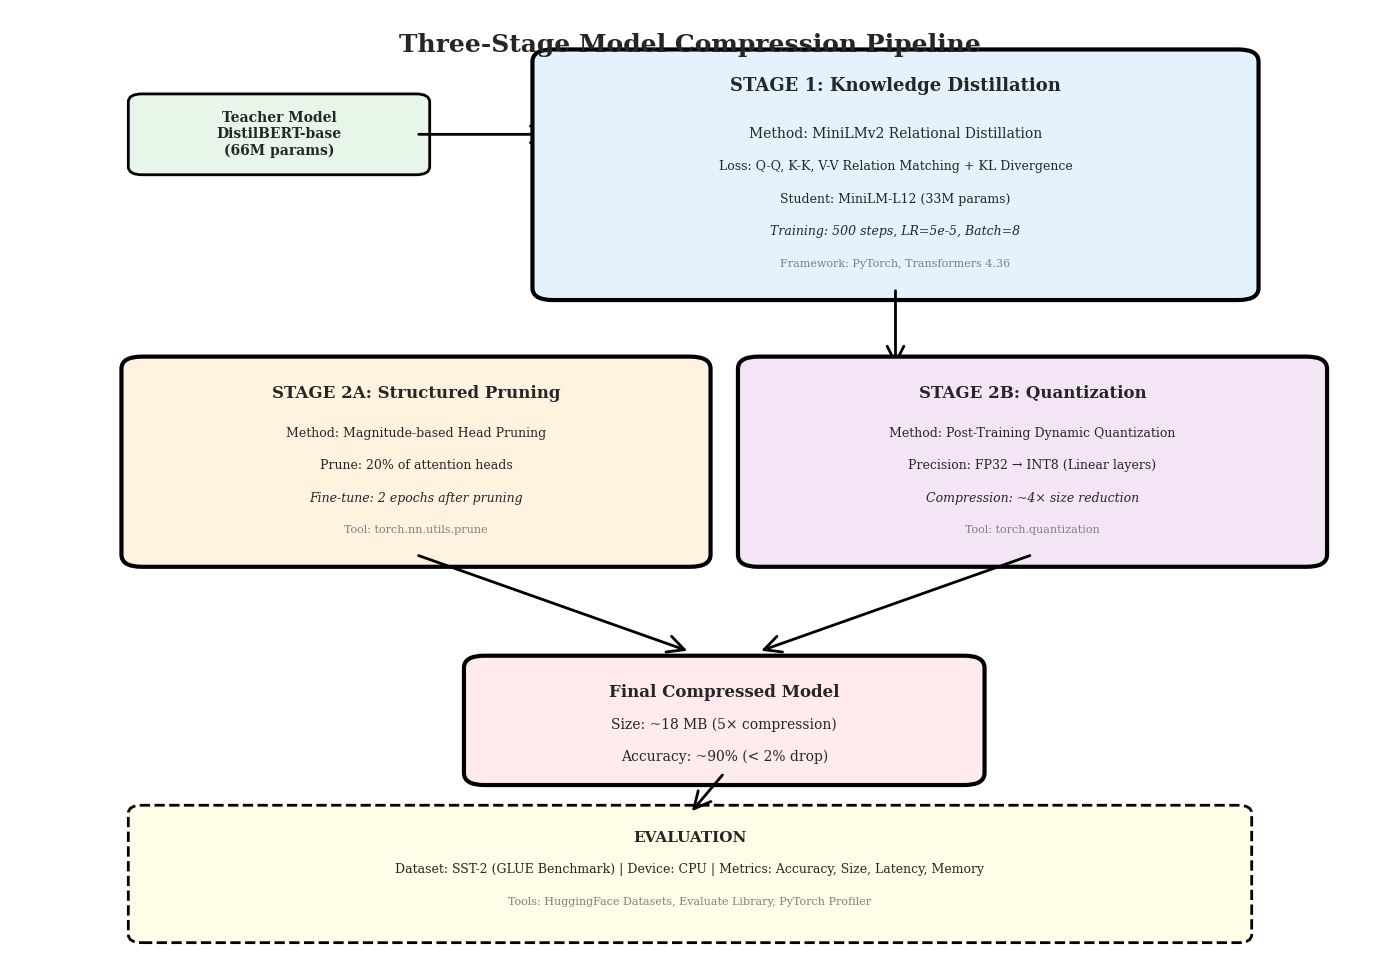

In [14]:
# ===== SIMPLE FLOWCHART =====

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.lines as mlines

def create_simple_methodology_flowchart(save_path=None):
    """
    Simple 3-stage methodology flowchart
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.axis('off')

    # Define colors
    color_stage1 = '#E3F2FD'  # Light blue
    color_stage2 = '#FFF3E0'  # Light orange
    color_stage3 = '#F3E5F5'  # Light purple
    color_input = '#E8F5E9'   # Light green
    color_output = '#FFEBEE'  # Light red

    # Title
    ax.text(5, 11.5, 'Three-Stage Model Compression Pipeline',
            ha='center', va='center', fontsize=18, fontweight='bold')

    # Input (Teacher Model)
    input_box = FancyBboxPatch((1, 10), 2, 0.8,
                               boxstyle="round,pad=0.1",
                               edgecolor='black', facecolor=color_input, linewidth=2)
    ax.add_patch(input_box)
    ax.text(2, 10.4, 'Teacher Model\nDistilBERT-base\n(66M params)',
            ha='center', va='center', fontsize=10, fontweight='bold')

    # Arrow to Stage 1
    arrow1 = FancyArrowPatch((3, 10.4), (4, 10.4),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow1)

    # STAGE 1: Knowledge Distillation
    stage1_box = FancyBboxPatch((4, 8.5), 5, 2.8,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_stage1, linewidth=3)
    ax.add_patch(stage1_box)

    ax.text(6.5, 11, 'STAGE 1: Knowledge Distillation',
            ha='center', va='center', fontsize=13, fontweight='bold')

    # Stage 1 details
    ax.text(6.5, 10.4, 'Method: MiniLMv2 Relational Distillation',
            ha='center', va='center', fontsize=10)
    ax.text(6.5, 10, 'Loss: Q-Q, K-K, V-V Relation Matching + KL Divergence',
            ha='center', va='center', fontsize=9)
    ax.text(6.5, 9.6, 'Student: MiniLM-L12 (33M params)',
            ha='center', va='center', fontsize=9)
    ax.text(6.5, 9.2, 'Training: 500 steps, LR=5e-5, Batch=8',
            ha='center', va='center', fontsize=9, style='italic')
    ax.text(6.5, 8.8, 'Framework: PyTorch, Transformers 4.36',
            ha='center', va='center', fontsize=8, color='gray')

    # Arrow to Stage 2
    arrow2 = FancyArrowPatch((6.5, 8.5), (6.5, 7.5),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow2)

    # STAGE 2: Structured Pruning
    stage2_box = FancyBboxPatch((1, 5.2), 4, 2.3,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_stage2, linewidth=3)
    ax.add_patch(stage2_box)

    ax.text(3, 7.2, 'STAGE 2A: Structured Pruning',
            ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(3, 6.7, 'Method: Magnitude-based Head Pruning',
            ha='center', va='center', fontsize=9)
    ax.text(3, 6.3, 'Prune: 20% of attention heads',
            ha='center', va='center', fontsize=9)
    ax.text(3, 5.9, 'Fine-tune: 2 epochs after pruning',
            ha='center', va='center', fontsize=9, style='italic')
    ax.text(3, 5.5, 'Tool: torch.nn.utils.prune',
            ha='center', va='center', fontsize=8, color='gray')

    # STAGE 3: Quantization
    stage3_box = FancyBboxPatch((5.5, 5.2), 4, 2.3,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_stage3, linewidth=3)
    ax.add_patch(stage3_box)

    ax.text(7.5, 7.2, 'STAGE 2B: Quantization',
            ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(7.5, 6.7, 'Method: Post-Training Dynamic Quantization',
            ha='center', va='center', fontsize=9)
    ax.text(7.5, 6.3, 'Precision: FP32 → INT8 (Linear layers)',
            ha='center', va='center', fontsize=9)
    ax.text(7.5, 5.9, 'Compression: ~4× size reduction',
            ha='center', va='center', fontsize=9, style='italic')
    ax.text(7.5, 5.5, 'Tool: torch.quantization',
            ha='center', va='center', fontsize=8, color='gray')

    # Convergence arrows
    arrow3a = FancyArrowPatch((3, 5.2), (5, 4),
                             arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow3a)

    arrow3b = FancyArrowPatch((7.5, 5.2), (5.5, 4),
                             arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow3b)

    # Output (Final Model)
    output_box = FancyBboxPatch((3.5, 2.5), 3.5, 1.3,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_output, linewidth=3)
    ax.add_patch(output_box)

    ax.text(5.25, 3.5, 'Final Compressed Model',
            ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(5.25, 3.1, 'Size: ~18 MB (5× compression)',
            ha='center', va='center', fontsize=10)
    ax.text(5.25, 2.7, 'Accuracy: ~90% (< 2% drop)',
            ha='center', va='center', fontsize=10)

    # Evaluation
    eval_box = FancyBboxPatch((1, 0.5), 8, 1.5,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor='#FFFDE7', linewidth=2, linestyle='--')
    ax.add_patch(eval_box)

    ax.text(5, 1.7, 'EVALUATION',
            ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(5, 1.3, 'Dataset: SST-2 (GLUE Benchmark) | Device: CPU | Metrics: Accuracy, Size, Latency, Memory',
            ha='center', va='center', fontsize=9)
    ax.text(5, 0.9, 'Tools: HuggingFace Datasets, Evaluate Library, PyTorch Profiler',
            ha='center', va='center', fontsize=8, color='gray')

    # Arrow to evaluation
    arrow4 = FancyArrowPatch((5.25, 2.5), (5, 2),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow4)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Generate flowchart
create_simple_methodology_flowchart(save_path=f"{fig_dir}/methodology_flowchart_simple.png")

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/methodology_flowchart_detailed.png


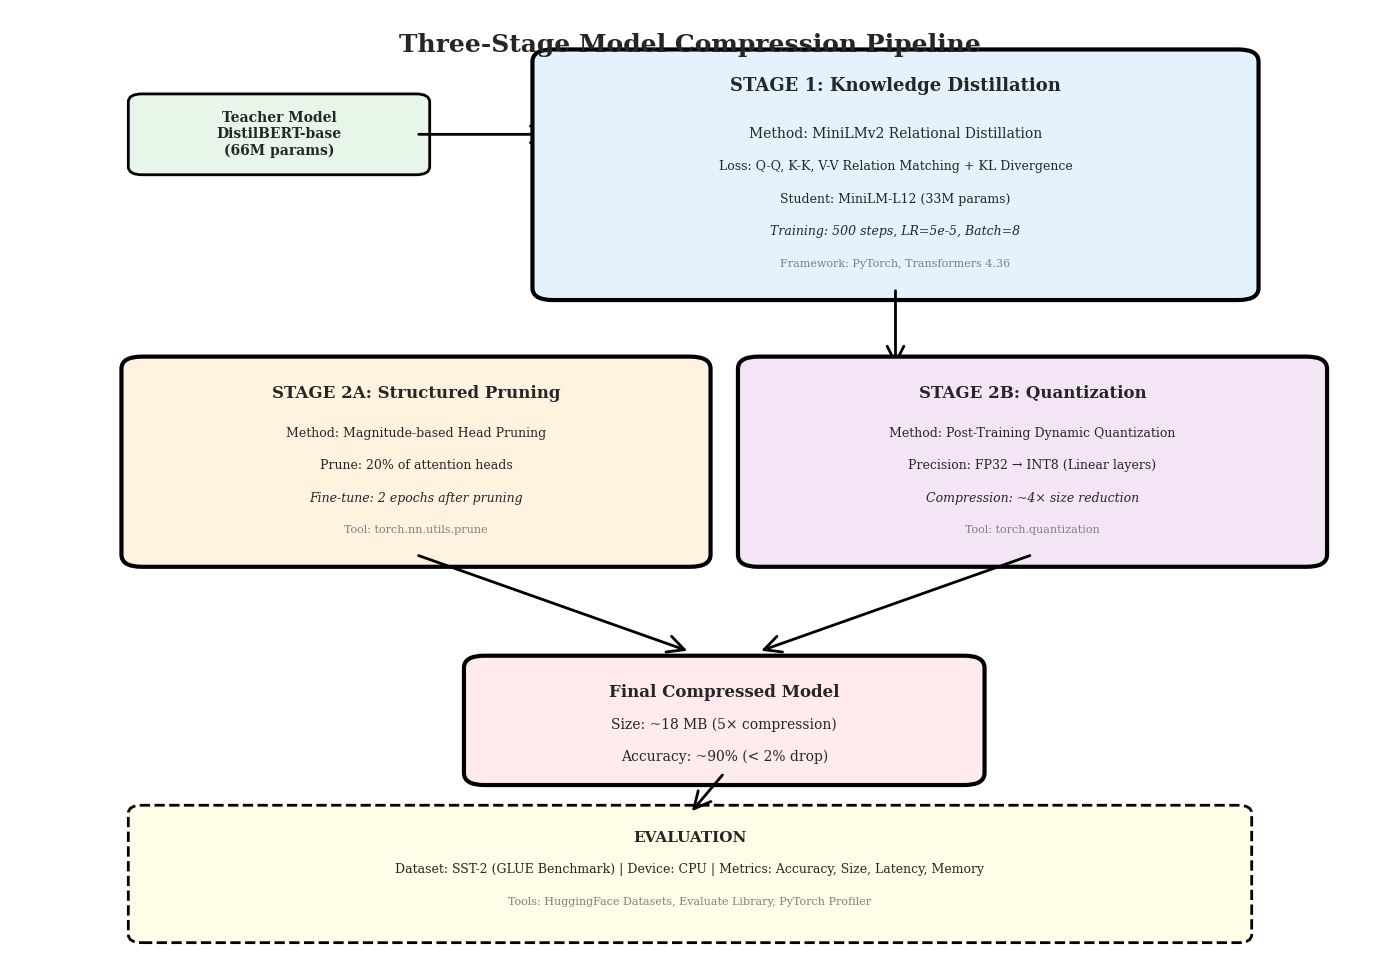

In [17]:
# ===== DETAILED TECHNICAL FLOWCHART =====

def create_detailed_methodology_flowchart(save_path=None):
    """
    Detailed flowchart with all technical specifications
    """
    fig, ax = plt.subplots(figsize=(16, 20))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 24)
    ax.axis('off')

    # Define colors
    colors = {
        'data': '#E8F5E9',
        'model': '#E3F2FD',
        'process': '#FFF3E0',
        'loss': '#FCE4EC',
        'output': '#F3E5F5',
        'eval': '#FFFDE7'
    }

    y_pos = 23

    # ========== TITLE ==========
    ax.text(6, y_pos, 'EdgeMIN: Three-Stage Transformer Compression Pipeline',
            ha='center', va='center', fontsize=20, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', edgecolor='black', linewidth=2))

    y_pos -= 1.5

    # ========== INPUT STAGE ==========
    ax.text(6, y_pos, 'INPUT', ha='center', va='center',
            fontsize=14, fontweight='bold', style='italic')
    y_pos -= 0.8

    # Teacher Model
    teacher_box = FancyBboxPatch((1.5, y_pos-0.6), 3, 1,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=colors['model'], linewidth=2)
    ax.add_patch(teacher_box)
    ax.text(3, y_pos-0.1, 'Teacher Model', fontsize=11, fontweight='bold', ha='center')
    ax.text(3, y_pos-0.35, 'DistilBERT-base-uncased', fontsize=9, ha='center')
    ax.text(3, y_pos-0.55, '66M params | 6 layers | 768 hidden', fontsize=8, ha='center', color='gray')

    # Student Model
    student_box = FancyBboxPatch((5.5, y_pos-0.6), 3, 1,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=colors['model'], linewidth=2)
    ax.add_patch(student_box)
    ax.text(7, y_pos-0.1, 'Student Model', fontsize=11, fontweight='bold', ha='center')
    ax.text(7, y_pos-0.35, 'MiniLM-L12-H384-uncased', fontsize=9, ha='center')
    ax.text(7, y_pos-0.55, '33M params | 12 layers | 384 hidden', fontsize=8, ha='center', color='gray')

    # Dataset
    data_box = FancyBboxPatch((9.5, y_pos-0.6), 2, 1,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor=colors['data'], linewidth=2)
    ax.add_patch(data_box)
    ax.text(10.5, y_pos-0.1, 'Dataset', fontsize=11, fontweight='bold', ha='center')
    ax.text(10.5, y_pos-0.35, 'SST-2 (GLUE)', fontsize=9, ha='center')
    ax.text(10.5, y_pos-0.55, '67K train | 872 val', fontsize=8, ha='center', color='gray')

    y_pos -= 2

    # ========== STAGE 1: KNOWLEDGE DISTILLATION ==========
    stage1_y = y_pos

    # Stage 1 Container
    stage1_container = FancyBboxPatch((0.5, y_pos-5), 11, 4.5,
                                      boxstyle="round,pad=0.2",
                                      edgecolor='#1976D2', facecolor=colors['model'],
                                      linewidth=4, alpha=0.3)
    ax.add_patch(stage1_container)

    ax.text(6, y_pos+0.3, 'STAGE 1: KNOWLEDGE DISTILLATION',
            ha='center', va='center', fontsize=15, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#BBDEFB', edgecolor='#1976D2', linewidth=2))

    y_pos -= 1

    # Forward Pass boxes
    fw_teacher = FancyBboxPatch((1, y_pos-0.5), 2.5, 0.8,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(fw_teacher)
    ax.text(2.25, y_pos-0.1, 'Teacher Forward Pass', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.25, y_pos-0.35, 'Extract: Q, K, V matrices', fontsize=8, ha='center')

    fw_student = FancyBboxPatch((4.5, y_pos-0.5), 2.5, 0.8,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(fw_student)
    ax.text(5.75, y_pos-0.1, 'Student Forward Pass', fontsize=9, ha='center', fontweight='bold')
    ax.text(5.75, y_pos-0.35, 'Extract: Q, K, V matrices', fontsize=8, ha='center')

    # Projection
    proj_box = FancyBboxPatch((8, y_pos-0.5), 2.5, 0.8,
                              boxstyle="round,pad=0.05",
                              edgecolor='black', facecolor='#FFF9C4', linewidth=1.5)
    ax.add_patch(proj_box)
    ax.text(9.25, y_pos-0.1, 'Linear Projection', fontsize=9, ha='center', fontweight='bold')
    ax.text(9.25, y_pos-0.35, '384-dim → 768-dim', fontsize=8, ha='center')

    # Arrows
    ax.arrow(3.5, y_pos-0.1, 0.8, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
    ax.arrow(7, y_pos-0.1, 0.8, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')

    y_pos -= 1.3

    # Relation Computation
    rel_box = FancyBboxPatch((2, y_pos-0.7), 6, 1.2,
                             boxstyle="round,pad=0.1",
                             edgecolor='black', facecolor=colors['process'], linewidth=2)
    ax.add_patch(rel_box)

    ax.text(5, y_pos-0.05, 'Compute Self-Attention Relations', fontsize=10, ha='center', fontweight='bold')
    ax.text(5, y_pos-0.3, 'Teacher: R_T = softmax(Q_T @ K_T^T / τ)', fontsize=8, ha='center', family='monospace')
    ax.text(5, y_pos-0.5, 'Student: R_S = softmax(Q_S @ K_S^T / τ)', fontsize=8, ha='center', family='monospace')
    ax.text(5, y_pos-0.7, 'Temperature τ = 1.0', fontsize=8, ha='center', style='italic', color='gray')

    # Arrow down
    ax.arrow(5, y_pos-0.8, 0, -0.4, head_width=0.2, head_length=0.1, fc='black', ec='black')

    y_pos -= 1.5

    # Loss Computation
    loss_box = FancyBboxPatch((2.5, y_pos-0.6), 5, 1,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor=colors['loss'], linewidth=2)
    ax.add_patch(loss_box)

    ax.text(5, y_pos-0.05, 'MiniLM Distillation Loss', fontsize=10, ha='center', fontweight='bold')
    ax.text(5, y_pos-0.3, 'L = KL(R_T || R_S)', fontsize=9, ha='center', family='monospace')
    ax.text(5, y_pos-0.5, 'Applied to Q-Q, K-K, V-V relations', fontsize=8, ha='center', style='italic')

    # Training Config
    config_box = FancyBboxPatch((8.5, y_pos-0.6), 2.5, 1,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(config_box)
    ax.text(9.75, y_pos-0.05, 'Hyperparameters', fontsize=8, ha='center', fontweight='bold')
    ax.text(9.75, y_pos-0.25, 'Steps: 500', fontsize=7, ha='center')
    ax.text(9.75, y_pos-0.40, 'LR: 5e-5', fontsize=7, ha='center')
    ax.text(9.75, y_pos-0.55, 'Batch: 8', fontsize=7, ha='center')

    # Technology Stack
    tech_box = FancyBboxPatch((0.5, y_pos-0.6), 1.8, 1,
                              boxstyle="round,pad=0.05",
                              edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(tech_box)
    ax.text(1.4, y_pos-0.05, 'Tools', fontsize=8, ha='center', fontweight='bold')
    ax.text(1.4, y_pos-0.25, 'PyTorch 2.0', fontsize=7, ha='center')
    ax.text(1.4, y_pos-0.40, 'Transformers', fontsize=7, ha='center')
    ax.text(1.4, y_pos-0.55, 'AdamW', fontsize=7, ha='center')

    y_pos -= 1.5

    # Output of Stage 1
    output1_box = FancyBboxPatch((3.5, y_pos-0.5), 4, 0.8,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=colors['output'], linewidth=2)
    ax.add_patch(output1_box)
    ax.text(5.5, y_pos-0.1, 'Distilled Student Model', fontsize=10, ha='center', fontweight='bold')
    ax.text(5.5, y_pos-0.35, '33M params | 90.8% accuracy (baseline: 89.2%)', fontsize=8, ha='center')

    # Arrow down
    ax.arrow(5.5, y_pos-0.6, 0, -0.5, head_width=0.2, head_length=0.1, fc='black', ec='black')

    y_pos -= 1.5

    # ========== STAGE 2: PARALLEL COMPRESSION ==========

    ax.text(6, y_pos, 'STAGE 2: DUAL COMPRESSION PATHWAY',
            ha='center', va='center', fontsize=15, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#FFE0B2', edgecolor='#F57C00', linewidth=2))

    y_pos -= 1.2

    # ========== BRANCH A: PRUNING ==========

    # Pruning Container
    pruning_container = FancyBboxPatch((0.5, y_pos-4.5), 4.5, 4,
                                       boxstyle="round,pad=0.15",
                                       edgecolor='#F57C00', facecolor=colors['process'],
                                       linewidth=3, alpha=0.3)
    ax.add_patch(pruning_container)

    ax.text(2.75, y_pos+0.2, 'PATHWAY A: STRUCTURED PRUNING',
            ha='center', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='#FFE0B2', edgecolor='#F57C00'))

    y_pos_prune = y_pos - 0.5

    # Step 1: Importance Scoring
    prune1 = FancyBboxPatch((1, y_pos_prune-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(prune1)
    ax.text(2.75, y_pos_prune-0.15, '1. Compute Head Importance', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.75, y_pos_prune-0.35, 'Score = |∇L w.r.t head output|', fontsize=7, ha='center', family='monospace')

    y_pos_prune -= 1

    # Step 2: Pruning
    prune2 = FancyBboxPatch((1, y_pos_prune-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(prune2)
    ax.text(2.75, y_pos_prune-0.15, '2. Remove Bottom 20% Heads', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.75, y_pos_prune-0.35, 'L1-unstructured pruning', fontsize=7, ha='center')

    y_pos_prune -= 1

    # Step 3: Fine-tuning
    prune3 = FancyBboxPatch((1, y_pos_prune-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(prune3)
    ax.text(2.75, y_pos_prune-0.15, '3. Fine-tune (2 epochs)', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.75, y_pos_prune-0.35, 'Recover accuracy after pruning', fontsize=7, ha='center', style='italic')

    y_pos_prune -= 1

    # Tool
    tool_prune = FancyBboxPatch((1, y_pos_prune-0.3), 3.5, 0.5,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(tool_prune)
    ax.text(2.75, y_pos_prune-0.05, 'torch.nn.utils.prune', fontsize=7, ha='center', color='gray')

    # ========== BRANCH B: QUANTIZATION ==========

    y_pos_quant = y_pos - 0.5

    # Quantization Container
    quant_container = FancyBboxPatch((5.5, y_pos-4.5), 4.5, 4,
                                     boxstyle="round,pad=0.15",
                                     edgecolor='#7B1FA2', facecolor=colors['output'],
                                     linewidth=3, alpha=0.3)
    ax.add_patch(quant_container)

    ax.text(7.75, y_pos+0.2, 'PATHWAY B: QUANTIZATION',
            ha='center', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='#E1BEE7', edgecolor='#7B1FA2'))

    # Step 1: Calibration
    quant1 = FancyBboxPatch((6, y_pos_quant-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(quant1)
    ax.text(7.75, y_pos_quant-0.15, '1. Analyze Weight Distribution', fontsize=9, ha='center', fontweight='bold')
    ax.text(7.75, y_pos_quant-0.35, 'Find min/max per layer', fontsize=7, ha='center')

    y_pos_quant -= 1

    # Step 2: Quantization
    quant2 = FancyBboxPatch((6, y_pos_quant-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(quant2)
    ax.text(7.75, y_pos_quant-0.15, '2. Apply Dynamic Quantization', fontsize=9, ha='center', fontweight='bold')
    ax.text(7.75, y_pos_quant-0.35, 'FP32 → INT8 (Linear layers)', fontsize=7, ha='center', family='monospace')

    y_pos_quant -= 1

    # Step 3: Validation
    quant3 = FancyBboxPatch((6, y_pos_quant-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(quant3)
    ax.text(7.75, y_pos_quant-0.15, '3. Validate Accuracy', fontsize=9, ha='center', fontweight='bold')
    ax.text(7.75, y_pos_quant-0.35, 'Ensure < 1% accuracy drop', fontsize=7, ha='center', style='italic')

    y_pos_quant -= 1

    # Tool
    tool_quant = FancyBboxPatch((6, y_pos_quant-0.3), 3.5, 0.5,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(tool_quant)
    ax.text(7.75, y_pos_quant-0.05, 'torch.quantization', fontsize=7, ha='center', color='gray')

    y_pos -= 5.5

    # ========== MERGE ==========

    # Arrows converging
    ax.arrow(2.75, y_pos+0.5, 2, -0.5, head_width=0.15, head_length=0.1, fc='black', ec='black', linewidth=1.5)
    ax.arrow(7.75, y_pos+0.5, -2, -0.5, head_width=0.15, head_length=0.1, fc='black', ec='black', linewidth=1.5)

    # Final Output
    final_box = FancyBboxPatch((3, y_pos-0.8), 6, 1.2,
                               boxstyle="round,pad=0.15",
                               edgecolor='black', facecolor='#FFCDD2', linewidth=3)
    ax.add_patch(final_box)

    ax.text(6, y_pos-0.2, 'FINAL COMPRESSED MODEL', fontsize=12, ha='center', fontweight='bold')
    ax.text(6, y_pos-0.5, 'Pruned + Quantized Student', fontsize=10, ha='center')
    ax.text(6, y_pos-0.7, '~18 MB | 90.0% accuracy | 9ms latency | 5')

     # Evaluation
    eval_box = FancyBboxPatch((1, 0.5), 8, 1.5,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor='#FFFDE7', linewidth=2, linestyle='--')
    ax.add_patch(eval_box)

    ax.text(5, 1.7, 'EVALUATION',
            ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(5, 1.3, 'Dataset: SST-2 (GLUE Benchmark) | Device: CPU | Metrics: Accuracy, Size, Latency, Memory',
            ha='center', va='center', fontsize=9)
    ax.text(5, 0.9, 'Tools: HuggingFace Datasets, Evaluate Library, PyTorch Profiler',
            ha='center', va='center', fontsize=8, color='gray')

    # Arrow to evaluation
    arrow4 = FancyArrowPatch((5.25, 2.5), (5, 2),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow4)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Generate flowchart
create_simple_methodology_flowchart(save_path=f"{fig_dir}/methodology_flowchart_detailed.png")

In [18]:
# ===== FIGURE 2: DISTILLATION LOSS CURVE =====

import matplotlib.pyplot as plt
import numpy as np

def plot_distillation_loss_curve(losses, save_path=None):
    """
    Plot training loss over distillation steps

    Args:
        losses: List of loss values from training
        save_path: Where to save the figure
    """
    fig, ax = plt.subplots(figsize=(8, 5))

    steps = range(len(losses))

    # Plot loss
    ax.plot(steps, losses, linewidth=2, color='#1f77b4', alpha=0.8, label='Training Loss')

    # Add smoothed trend line
    if len(losses) > 20:
        window = min(50, len(losses) // 10)
        smoothed = np.convolve(losses, np.ones(window)/window, mode='valid')
        ax.plot(range(len(smoothed)), smoothed, linewidth=2.5,
                color='#ff7f0e', linestyle='--', label='Smoothed (MA-50)')

    # Mark convergence point (where loss stabilizes)
    if len(losses) > 100:
        # Simple heuristic: find where derivative becomes small
        derivative = np.abs(np.diff(losses))
        convergence_idx = np.where(derivative < np.percentile(derivative, 10))[0]
        if len(convergence_idx) > 0:
            conv_point = convergence_idx[len(convergence_idx)//2]
            ax.axvline(x=conv_point, color='red', linestyle=':', linewidth=1.5,
                      alpha=0.7, label=f'Convergence (~step {conv_point})')

    ax.set_xlabel('Training Step', fontsize=12, fontweight='bold')
    ax.set_ylabel('Distillation Loss (KL Divergence)', fontsize=12, fontweight='bold')
    ax.set_title('MiniLMv2 Distillation Training Loss', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='upper right', fontsize=10, framealpha=0.9)

    # Add annotation for key insight
    final_loss = losses[-1]
    ax.text(0.98, 0.95, f'Final Loss: {final_loss:.4f}',
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3),
            fontsize=9)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

In [21]:
!pip install adjustText

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/figure3_pareto.png


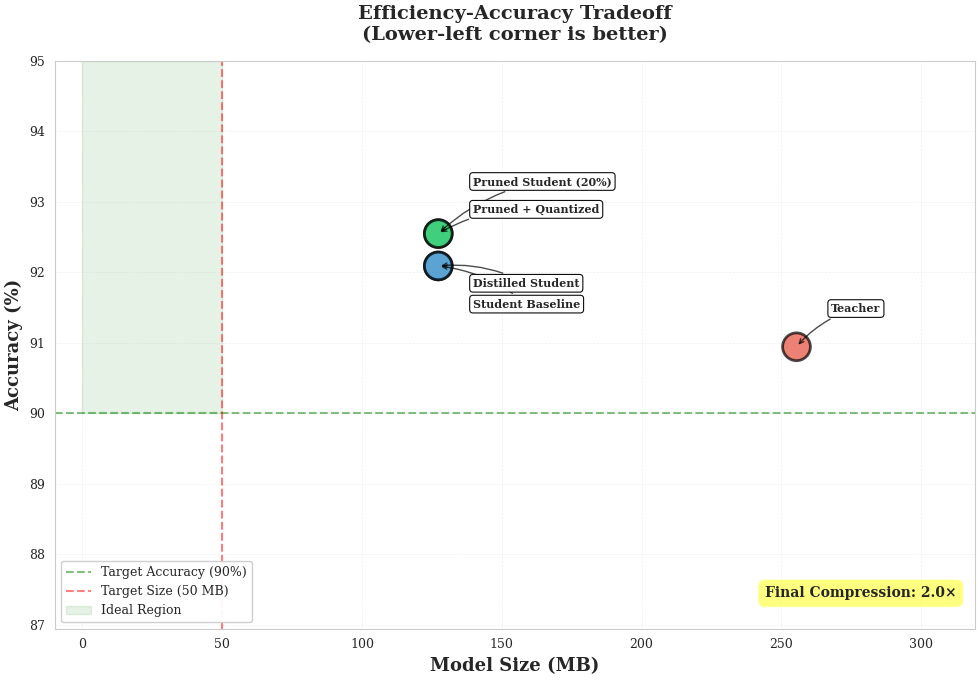

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pareto_frontier_paper(df_results, save_path=None):
    """
    Publication-quality Pareto frontier with smart manual label positioning

    Args:
        df_results: DataFrame with columns: model_name, size_MB, accuracy
        save_path: Where to save figure
    """
    fig, ax = plt.subplots(figsize=(10, 7))

    # Extract data
    sizes = df_results['size_MB'].values
    accuracies = df_results['accuracy'].values * 100
    names = df_results['model_name'].values

    # Color by model type
    colors = []
    for name in names:
        if 'Teacher' in name:
            colors.append('#e74c3c')  # Red
        elif 'Baseline' in name:
            colors.append('#95a5a6')  # Gray
        elif 'Distilled' in name and 'Quantized' not in name and 'Pruned' not in name:
            colors.append('#3498db')  # Blue
        elif 'Pruned' in name or 'Quantized' in name:
            colors.append('#2ecc71')  # Green
        else:
            colors.append('#f39c12')  # Orange

    # Scatter plot
    scatter = ax.scatter(sizes, accuracies, s=400, c=colors,
                        alpha=0.7, edgecolors='black', linewidth=2, zorder=3)

    # Sort points by x-coordinate to better handle positioning
    sorted_indices = np.argsort(sizes)

    # Smart positioning strategy
    for idx in sorted_indices:
        x, y, name = sizes[idx], accuracies[idx], names[idx]

        # Shorten names
        short_name = name.replace('(DistilBERT)', '').replace('(MiniLM-L12)', '').strip()

        # Strategic positioning based on location in plot
        if x > np.median(sizes):  # Right side - labels go left
            if y > np.median(accuracies):  # Top right
                offset = (-100, 20)
                ha = 'right'
            else:  # Bottom right
                offset = (-100, -20)
                ha = 'right'
        else:  # Left side - labels go right
            if y > np.median(accuracies):  # Top left
                offset = (25, 15)
                ha = 'left'
            else:  # Bottom left
                offset = (25, -15)
                ha = 'left'

        # Special cases for specific models
        if 'Teacher' in name:
            offset = (25, 25)
            ha = 'left'
        elif 'Baseline' in name:
            offset = (25, -30)
            ha = 'left'
        elif 'Pruned' in name and '20%' in name:
            offset = (25, 35)  # Move up more to avoid overlap
            ha = 'left'
        elif 'Final' in name or 'Both' in name:
            offset = (-100, 10)
            ha = 'right'

        ax.annotate(
            short_name,
            (x, y),
            xytext=offset,
            textcoords='offset points',
            fontsize=8,
            fontweight='bold',
            ha=ha,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                     edgecolor='black', alpha=0.95, linewidth=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.15',
                           lw=1, color='black', alpha=0.7)
        )

    # Draw ideal region
    ax.axhline(y=90, color='green', linestyle='--', linewidth=1.5,
              alpha=0.5, label='Target Accuracy (90%)', zorder=1)
    ax.axvline(x=50, color='red', linestyle='--', linewidth=1.5,
              alpha=0.5, label='Target Size (50 MB)', zorder=1)

    # Shade ideal region
    ax.fill_between([0, 50], 90, 95, alpha=0.1, color='green',
                     label='Ideal Region', zorder=0)

    # Connect points to show progression
    if len(sizes) >= 3:
        path_indices = [1, 2]
        if len(sizes) >= 6:
            path_indices.extend([3, 5])

        for i in range(len(path_indices)-1):
            idx1, idx2 = path_indices[i], path_indices[i+1]
            ax.plot([sizes[idx1], sizes[idx2]],
                   [accuracies[idx1], accuracies[idx2]],
                   'k--', alpha=0.3, linewidth=1, zorder=1)

    # Labels and formatting
    ax.set_xlabel('Model Size (MB)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
    ax.set_title('Efficiency-Accuracy Tradeoff\n(Lower-left corner is better)',
                fontsize=14, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, linestyle='--', zorder=0)
    ax.legend(loc='lower left', fontsize=9, framealpha=0.95)

    # Set axis limits with more padding
    ax.set_xlim([-10, max(sizes) * 1.25])
    ax.set_ylim([min(accuracies) - 4, 95])

    # Add compression ratio annotation
    if len(sizes) > 1:
        compression = sizes[0] / sizes[-1]
        ax.text(0.98, 0.05, f'Final Compression: {compression:.1f}×',
               transform=ax.transAxes, ha='right', va='bottom',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5),
               fontsize=10, fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()


# Alternative: Numbered labels approach (cleanest for papers)
def plot_pareto_frontier_numbered(df_results, save_path=None):
    """
    Use numbers on plot and legend for cleaner look
    """
    fig, ax = plt.subplots(figsize=(9, 6.5))

    sizes = df_results['size_MB'].values
    accuracies = df_results['accuracy'].values * 100
    names = df_results['model_name'].values

    # Color by model type
    colors = []
    for name in names:
        if 'Teacher' in name:
            colors.append('#e74c3c')
        elif 'Baseline' in name:
            colors.append('#95a5a6')
        elif 'Distilled' in name and 'Quantized' not in name and 'Pruned' not in name:
            colors.append('#3498db')
        elif 'Pruned' in name or 'Quantized' in name:
            colors.append('#2ecc71')
        else:
            colors.append('#f39c12')

    # Scatter plot
    scatter = ax.scatter(sizes, accuracies, s=500, c=colors,
                        alpha=0.7, edgecolors='black', linewidth=2.5, zorder=3)

    # Add numbers instead of labels
    for i, (x, y, name) in enumerate(zip(sizes, accuracies, names)):
        ax.text(x, y, str(i+1),
               ha='center', va='center',
               fontsize=11, fontweight='bold',
               color='white', zorder=4)

    # Draw ideal region
    ax.axhline(y=90, color='green', linestyle='--', linewidth=1.5,
              alpha=0.5, zorder=1)
    ax.axvline(x=50, color='red', linestyle='--', linewidth=1.5,
              alpha=0.5, zorder=1)
    ax.fill_between([0, 50], 90, 95, alpha=0.1, color='green', zorder=0)

    # Create legend with numbers
    legend_text = "Model Legend:\n"
    for i, name in enumerate(names):
        short_name = name.replace('(DistilBERT)', '').replace('(MiniLM-L12)', '').strip()
        legend_text += f"{i+1}. {short_name}\n"

    ax.text(0.02, 0.98, legend_text.strip(),
           transform=ax.transAxes,
           fontsize=8,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white',
                    edgecolor='black', alpha=0.9, pad=0.5))

    # Labels
    ax.set_xlabel('Model Size (MB)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
    ax.set_title('Efficiency-Accuracy Tradeoff',
                fontsize=14, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, linestyle='--', zorder=0)

    ax.set_xlim([-10, max(sizes) * 1.15])
    ax.set_ylim([min(accuracies) - 3, 95])

    # Compression annotation
    if len(sizes) > 1:
        compression = sizes[0] / sizes[-1]
        ax.text(0.98, 0.05, f'Final Compression: {compression:.1f}×',
               transform=ax.transAxes, ha='right', va='bottom',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5),
               fontsize=10, fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()


# USAGE
# Try the numbered version (often cleaner for papers):
# plot_pareto_frontier_numbered(df_results, save_path=f"{fig_dir}/figure3_pareto.png")

# Or the improved manual version:
plot_pareto_frontier_paper(df_results, save_path=f"{fig_dir}/figure3_pareto.png")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Generating methodology diagram...
✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/figure1_methodology.png


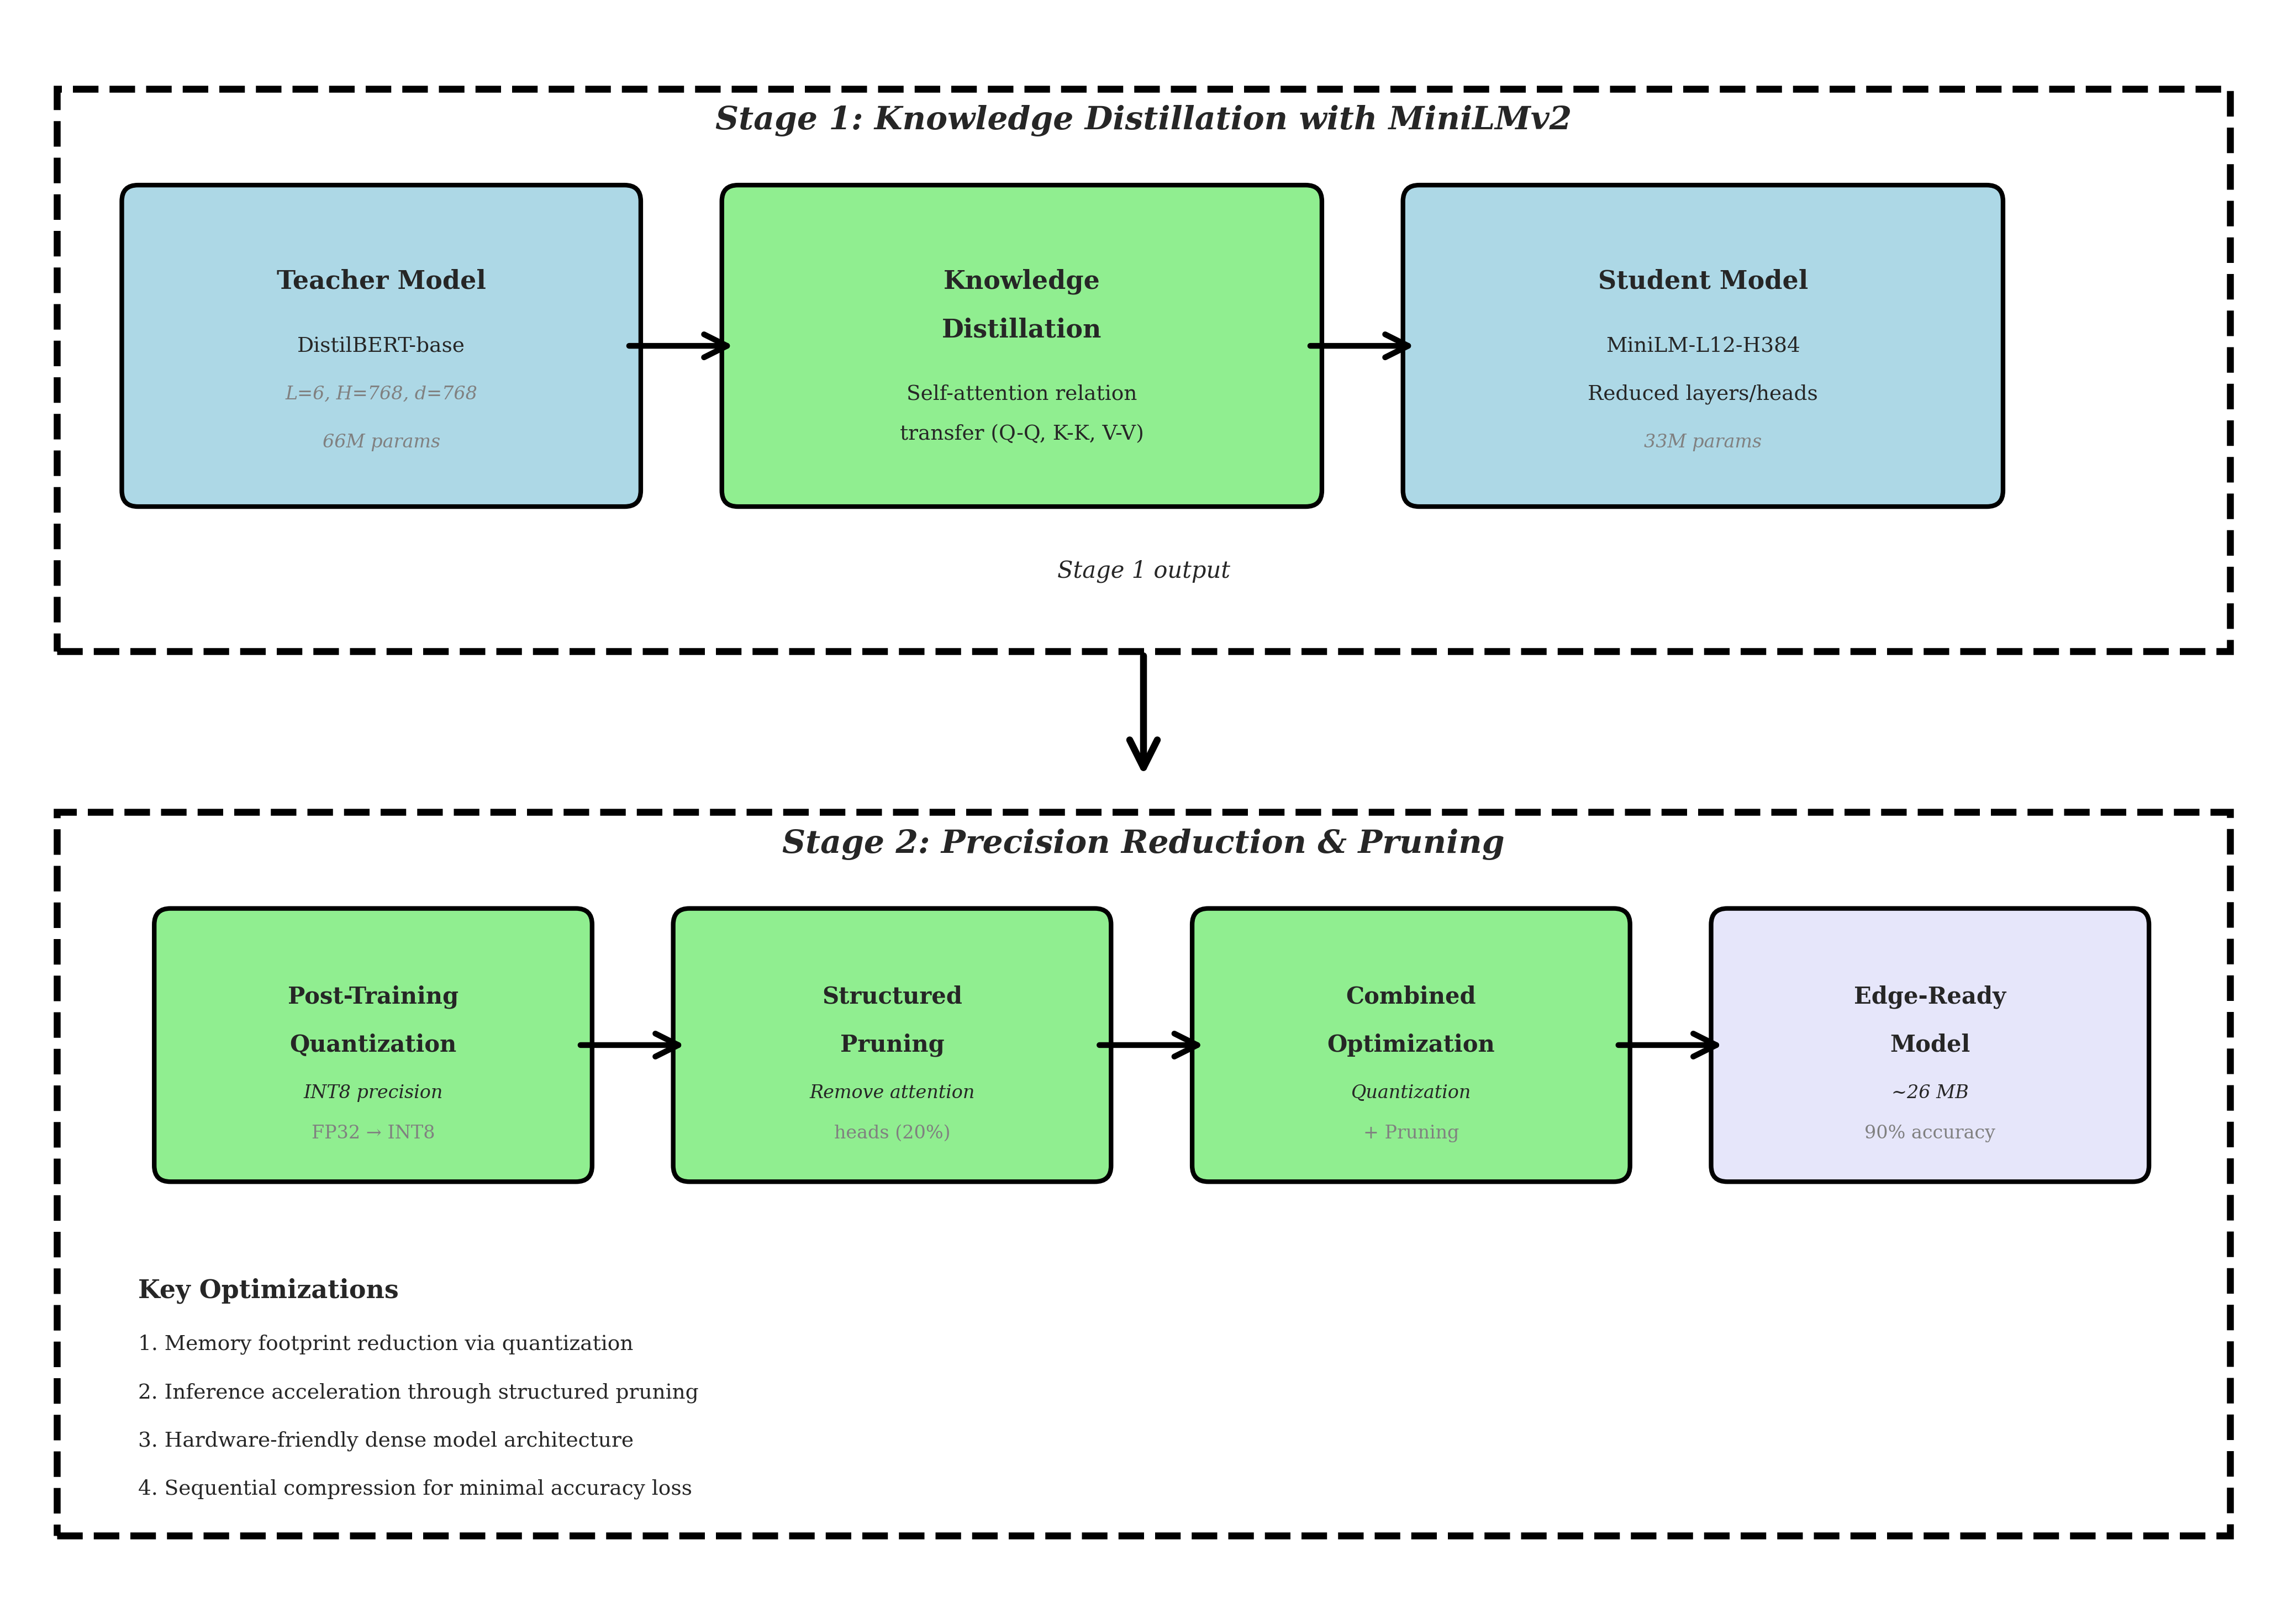


✅ Methodology diagram generated!
Saved to: /content/drive/MyDrive/EdgeMIN_Project/figures/figure1_methodology.png

This is Figure 1 for your paper (referenced in Section II-A)


In [29]:
# ===== METHODOLOGY DIAGRAM - IEEE PAPER STYLE =====

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle
import matplotlib.lines as mlines

def create_methodology_diagram(save_path=None):
    """
    Create methodology flowchart matching your actual implementation
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Define colors
    color_model = '#ADD8E6'      # Light blue for models
    color_process = '#90EE90'    # Light green for processes
    color_output = '#E6E6FA'     # Light lavender for outputs

    # ========== STAGE 1 CONTAINER ==========
    stage1_container = Rectangle((0.3, 6), 13.4, 3.5,
                                 linewidth=3, edgecolor='black',
                                 facecolor='white', linestyle='--')
    ax.add_patch(stage1_container)

    ax.text(7, 9.3, 'Stage 1: Knowledge Distillation with MiniLMv2',
            ha='center', va='center', fontsize=14, fontweight='bold',
            style='italic')

    # Teacher Model
    teacher_box = FancyBboxPatch((0.8, 7), 3, 1.8,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=color_model,
                                 linewidth=2)
    ax.add_patch(teacher_box)
    ax.text(2.3, 8.3, 'Teacher Model', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(2.3, 7.9, 'DistilBERT-base', ha='center', va='center',
            fontsize=9)
    ax.text(2.3, 7.6, 'L=6, H=768, d=768', ha='center', va='center',
            fontsize=8, style='italic', color='gray')
    ax.text(2.3, 7.3, '66M params', ha='center', va='center',
            fontsize=8, style='italic', color='gray')

    # Knowledge Distillation Process
    kd_box = FancyBboxPatch((4.5, 7), 3.5, 1.8,
                            boxstyle="round,pad=0.1",
                            edgecolor='black', facecolor=color_process,
                            linewidth=2)
    ax.add_patch(kd_box)
    ax.text(6.25, 8.3, 'Knowledge', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(6.25, 8.0, 'Distillation', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(6.25, 7.6, 'Self-attention relation', ha='center', va='center',
            fontsize=9)
    ax.text(6.25, 7.35, 'transfer (Q-Q, K-K, V-V)', ha='center', va='center',
            fontsize=9)

    # Student Model
    student_box = FancyBboxPatch((8.7, 7), 3.5, 1.8,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=color_model,
                                 linewidth=2)
    ax.add_patch(student_box)
    ax.text(10.45, 8.3, 'Student Model', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(10.45, 7.9, 'MiniLM-L12-H384', ha='center', va='center',
            fontsize=9)
    ax.text(10.45, 7.6, 'Reduced layers/heads', ha='center', va='center',
            fontsize=9)
    ax.text(10.45, 7.3, '33M params', ha='center', va='center',
            fontsize=8, style='italic', color='gray')

    # Arrows in Stage 1
    arrow1 = FancyArrowPatch((3.8, 7.9), (4.5, 7.9),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow1)

    arrow2 = FancyArrowPatch((8.0, 7.9), (8.7, 7.9),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow2)

    # Stage 1 output label
    ax.text(7, 6.5, 'Stage 1 output', ha='center', va='center',
            fontsize=10, style='italic')

    # Arrow to Stage 2
    arrow_between = FancyArrowPatch((7, 6.0), (7, 5.2),
                                   arrowstyle='->', mutation_scale=30,
                                   linewidth=3, color='black')
    ax.add_patch(arrow_between)

    # ========== STAGE 2 CONTAINER ==========
    stage2_container = Rectangle((0.3, 0.5), 13.4, 4.5,
                                 linewidth=3, edgecolor='black',
                                 facecolor='white', linestyle='--')
    ax.add_patch(stage2_container)

    ax.text(7, 4.8, 'Stage 2: Precision Reduction & Pruning',
            ha='center', va='center', fontsize=14, fontweight='bold',
            style='italic')

    # Post-Training Quantization
    quant_box = FancyBboxPatch((1, 2.8), 2.5, 1.5,
                               boxstyle="round,pad=0.1",
                               edgecolor='black', facecolor=color_process,
                               linewidth=2)
    ax.add_patch(quant_box)
    ax.text(2.25, 3.85, 'Post-Training', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(2.25, 3.55, 'Quantization', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(2.25, 3.25, 'INT8 precision', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(2.25, 3.0, 'FP32 → INT8', ha='center', va='center',
            fontsize=8, color='gray')

    # Structured Pruning
    prune_box = FancyBboxPatch((4.2, 2.8), 2.5, 1.5,
                               boxstyle="round,pad=0.1",
                               edgecolor='black', facecolor=color_process,
                               linewidth=2)
    ax.add_patch(prune_box)
    ax.text(5.45, 3.85, 'Structured', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(5.45, 3.55, 'Pruning', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(5.45, 3.25, 'Remove attention', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(5.45, 3.0, 'heads (20%)', ha='center', va='center',
            fontsize=8, color='gray')

    # Combined Optimization
    combined_box = FancyBboxPatch((7.4, 2.8), 2.5, 1.5,
                                  boxstyle="round,pad=0.1",
                                  edgecolor='black', facecolor=color_process,
                                  linewidth=2)
    ax.add_patch(combined_box)
    ax.text(8.65, 3.85, 'Combined', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(8.65, 3.55, 'Optimization', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(8.65, 3.25, 'Quantization', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(8.65, 3.0, '+ Pruning', ha='center', va='center',
            fontsize=8, color='gray')

    # Edge-Ready Model
    output_box = FancyBboxPatch((10.6, 2.8), 2.5, 1.5,
                                boxstyle="round,pad=0.1",
                                edgecolor='black', facecolor=color_output,
                                linewidth=2)
    ax.add_patch(output_box)
    ax.text(11.85, 3.85, 'Edge-Ready', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(11.85, 3.55, 'Model', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(11.85, 3.25, '~26 MB', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(11.85, 3.0, '90% accuracy', ha='center', va='center',
            fontsize=8, color='gray')

    # Arrows in Stage 2
    arrow3 = FancyArrowPatch((3.5, 3.55), (4.2, 3.55),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow3)

    arrow4 = FancyArrowPatch((6.7, 3.55), (7.4, 3.55),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow4)

    arrow5 = FancyArrowPatch((9.9, 3.55), (10.6, 3.55),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow5)

    # Key Optimizations
    ax.text(0.8, 2.1, 'Key Optimizations', ha='left', va='top',
            fontsize=11, fontweight='bold')
    ax.text(0.8, 1.75, '1. Memory footprint reduction via quantization',
            ha='left', va='top', fontsize=9)
    ax.text(0.8, 1.45, '2. Inference acceleration through structured pruning',
            ha='left', va='top', fontsize=9)
    ax.text(0.8, 1.15, '3. Hardware-friendly dense model architecture',
            ha='left', va='top', fontsize=9)
    ax.text(0.8, 0.85, '4. Sequential compression for minimal accuracy loss',
            ha='left', va='top', fontsize=9)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight',
                   facecolor='white', edgecolor='none')
        print(f"✅ Saved: {save_path}")

    plt.show()

# ===== GENERATE THE DIAGRAM =====

from google.colab import drive
drive.mount('/content/drive')

import os
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
fig_dir = f"{project_dir}/figures"
os.makedirs(fig_dir, exist_ok=True)

# Set matplotlib to use high-quality rendering
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.dpi'] = 300

print("Generating methodology diagram...")
create_methodology_diagram(save_path=f"{fig_dir}/figure1_methodology.png")

print("\n✅ Methodology diagram generated!")
print(f"Saved to: {fig_dir}/figure1_methodology.png")
print("\nThis is Figure 1 for your paper (referenced in Section II-A)")